#### **Objective of the Notebook**
***
The notebook is designed to conduct detailed analyses and annotations of medical imaging articles from the MICCAI 2023 conference. It primarily focuses on extracting and categorizing data about organs, image types, and datasets from these articles, and then analyzing how these categories distribute across various demographic parameters. Additionally, the notebook evaluates the geographical locations associated with the studies and assesses the disclosure status of datasets used within the articles.

#### Input Data Expected
1. **Excel File with Annotations**: The primary input is an Excel file named `annotation_data_raw.xlsx`, which contains extensive annotations related to medical imaging articles. This file should include multiple sheets, with at least one named `100_annotations` that provides detailed annotations for 100 articles.

   Expected columns in this sheet include:
   - `organ/body part in datasets`
   - `image type in datasets`
   - Demographic details such as `age`, `sex/gender`, `ethnicity`, and `geographical location`
   - `dataset quantity`, `quantity of public datasets`, `quantity of private datasets`
   - Various columns related to location for further categorization.

#### Output Data/Files Generated
1. **CSV Files**:
   - `organ_counts.csv`: Contains aggregated data regarding the counts and percentages of various organs mentioned across the dataset.
   - `image_type_counts.csv`: Details the counts and percentages of different image types identified throughout the dataset.

2. **Plots and Visualizations**:
   - Bar charts illustrating the distribution of organs and image types.
   - Stacked bar charts depicting demographic distributions related to organs and image types.
   - Diagrams or plots displaying the distribution of location information and dataset disclosure statuses.

3. **Preprocessed Data File**:
   - `preprocessed_annotation_data.csv`: A CSV file that includes cleaned and preprocessed data which may feature reclassified data points based on the analysis conducted.

#### Assumptions or Important Notes
1. **Data Completeness**: This notebook presupposes that the input Excel file is complete and accurately formatted with all required columns. Missing columns or incorrect formats could lead to errors or incomplete analyses.

2. **Category Definitions**: Definitions for categories like organs, image types, locations, and demographics are preset. Modifications to these definitions might necessitate adjustments in the processing scripts.

3. **Statistical Calculations**: The analysis assumes that basic statistical calculations (counts, percentages) are adequate for the analysis. While more complex statistical methods are not applied, they can be integrated if needed for more in-depth analysis.

4. **Plotting Defaults**: Visualizations employ default color schemes and styles as predefined in Matplotlib and Seaborn. For publication or presentation purposes, these plots might require further customization.

***

#### **Input Files**

| File Type | File Name                   | Description                                                                                                    |
|-----------|-----------------------------|----------------------------------------------------------------------------------------------------------------|
| Excel     | `annotation_data_raw.xlsx`  | An Excel file containing detailed annotations for medical imaging articles, including organ and image types, demographic details, and dataset information. |
| Excel sheets       | `100_annotations` & `annotation_notes`                  | Contains annotation data of 100 randomly selected MICCAI 2023 articles and related notes of datasets.|

#### **Output Files**

| File Type | File Name                            | Description                                                                                  |
|-----------|--------------------------------------|----------------------------------------------------------------------------------------------|
| CSV       | `05MICCAI_notebook_unique_organ.csv`                   | Contains counts and percentages of various organs mentioned across datasets. |           
| CSV       | `05MICCAI_notebook_unique_image_type.csv`              | Details the counts and percentages of different image types identified across datasets.    |
| CSV       | `05MICCAI_notebook_dataset_counts.csv`                   | Contains counts and percentages of various datasets mentioned across articles.              |
| CSV       | `05MICCAI_notebook_preprocessed_annotation_data.csv`   | A cleaned and preprocessed CSV file including reclassified data points based on the analysis.|
| CSV       | `05MICCAI_notebook_normalized_dataset.csv`         | Contains categorised name of datasets mentioned across articles.             |



## **Demographic and Dataset Insights from MICCAI 2023 Articles**
***

##### Packages, style settings and styling configurations

In [335]:
# Import standard libraries
import os
import re
import numpy as np
import pandas as pd
from collections import Counter

# Import visualization libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colormaps
import seaborn as sns

# Uncomment below if pandas and openpyxl are not installed
# !pip install pandas openpyxl

# You can uncomment these imports if needed
# from numpy import stack
# from sympy import li

In [336]:
# Styling configurations
COLOR = 'black'
mpl.rcParams.update({
    'text.color': COLOR,
    'axes.labelcolor': COLOR,
    'xtick.color': COLOR,
    'ytick.color': COLOR,
    'axes.edgecolor': COLOR,
    'axes.facecolor': 'white',
    'axes.linewidth': 0.5,
    'grid.color': 'grey',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'figure.facecolor': 'white'
})

In [337]:
def save_plot_to_folder(fig, filename, base_dir="05MICCAI_notebook_data_visualization"):
    """
    Saves a matplotlib figure to a specified directory with the given filename.
    
    Parameters:
        fig (matplotlib.figure.Figure): The figure object to save.
        filename (str): The name of the file to save the plot as.
        base_dir (str): The base directory where the plot will be saved.
    """
    # Ensure the base directory exists
    full_path = os.path.join(base_dir, filename)
    os.makedirs(os.path.dirname(full_path), exist_ok=True)
    
    # Save the figure
    fig.savefig(full_path, dpi=300, bbox_inches='tight', transparent=True)
    print(f"Plot saved to {full_path}")

***
### Load Excel File Containing Annotation Data
***

In [338]:
# Load the Excel file
file_path = '../annotation_data/annotation_data_raw.xlsx'
df1 = pd.read_excel(file_path, sheet_name='100_annotations').drop(columns=['notes','links/sup material '])

# Processing and extraction of unique organs and image types
organs = df1['organ/body part in datasets'].unique().tolist()
image_types = df1['image type in datasets'].unique().tolist()

def process_items(items):
    final_list = []
    for item in items:
        split_items = [x.strip() for x in item.split(",")]
        final_list.extend(split_items)
    return list(set(final_list))

unique_organs = process_items(organs)
unique_image_types = process_items(image_types)

print(f"Unique organs: {unique_organs}")
print(f"Unique image types: {unique_image_types}")

# Count occurrences
organ_counts = df1['organ/body part in datasets'].str.split(',').explode().str.strip().value_counts()
image_type_counts = df1['image type in datasets'].str.split(',').explode().str.strip().value_counts()

Unique organs: ['swine liver', 'gallbladder', 'head', 'pituitary gland', 'brain', 'bladder', 'femoral head', 'prostate', 'lymp nodes', 'rectum', 'Musculoskeletal', 'head and neck', 'breast', 'cerebral', 'oropharynx', 'pancreas', 'stroma', 'abdomen', 'pelvic region', 'cervical', 'small intestine', 'pelvis', 'blood vessels', 'lymph node', 'stomach', 'chest', 'neck', 'monkey brain', 'kidney', 'arterial', 'h&n', 'hepatic vein', 'liver', 'no organ mentioned', 'eye', 'lung', 'whole body', 'human brain', 'thorax', 'tissue', 'renal', 'colorectal', 'spleen', 'thyroid', 'hepatic', 'skin', 'colon', 'pelvic', 'heart', 'cervix']
Unique image types: ['mr', 'image titles', 'h&e stained whole slide images', 'wsi', 'biopsy slides', '2d echocardigrams', 'tomography', 'cect', 'mte', 'mr-ct', 'ultrasounds', 'tissue microarrays', 'mr t2 volumes', 'wsis', 'flair', 'photogrammetry 3d', 'mri', 'endoscope', 'h&e', 'colonoscopy', 'Ultrasound Elastography', 'intra-operative spectrometry', 'oct', 'dwi', 'stained 

***
## Pre-processing and Cleaning Annotation Data 
***

#### Pre-processing: Organs and Image 


In [339]:
# Output directory
output_dir = os.getcwd()

# Notebook name for output files to keep track of the notebook that generated the files
notebook_name = '05MICCAI_notebook_'

# Original DataFrame creation for organ counts
unique_organs = organ_counts.index.tolist()
unique_organs_df = pd.DataFrame({
    'organ': unique_organs,
    'count': organ_counts.values,
    'percentage': (organ_counts.values / organ_counts.sum()) * 100
})
output_file_organs = os.path.join(output_dir, notebook_name + 'unique_organs.csv')
unique_organs_df.to_csv(output_file_organs, index=False)

# Original DataFrame creation for image type counts
unique_image_types = image_type_counts.index.tolist()
unique_image_types_df = pd.DataFrame({
    'image type': unique_image_types,
    'count': image_type_counts.values,
    'percentage': (image_type_counts.values / image_type_counts.sum()) * 100
})

output_file_images = os.path.join(output_dir, notebook_name + 'unique_image_types.csv')
unique_image_types_df.to_csv(output_file_images, index=False)

##### Organ Categories
***

| Category                         | Organ Types |
|----------------------------------|-------------|
| Central Nervous System           | brain, human brain, cerebral |
| Head and Neck                    | eye, head, neck, head and neck, h&n, oropharynx |
| Cardiovascular System            | heart, vein, arterial, blood vessels |
| Respiratory System               | chest, lung, left lung, right lung, thorax |
| Digestive System                 | stomach, large bowel, duodenum, abdomen, colon, colorectal, rectum, small intestine, liver, gallbladder, hepatic, hepatic vein |
| Regulatory Systems               | lymph nodes, lymph nodes, spleen, thyroid, pituitary gland, pancreas |
| Genitourinary System             | pelvic region, pelvis, kidney, renal, bladder, femoral head |
| Structural and Protective Systems | skin, breast |
| Whole Body                       | whole body, tissue, stroma, Musculoskeletal |
| Male Reproductive System         | prostate |
| Female Reproductive System       | cervix, mammary glands + breast |
| No Organ Mentioned               | no organ mentioned |
| Zoology                          | swine liver, monkey brain |


In [340]:
organ_types_by_category = {
    "Central Nervous System"                    : ['brain', 'human brain', 'cerebral'],
    "Head and Neck"                             : ['eye', 'head', 'neck', 'head and neck', 'h&n', 'oropharynx'],
    "Cardiovascular System"                     : ['heart', 'vein', 'arterial', 'blood vessels'],
    "Respiratory System"                        : ['chest', 'lung', 'left lung', 'right lung', 'thorax'],
    "Digestive System"                          : ['stomach', 'large bowel', 'duodenum', 'abdomen', 'colon',  'colorectal',  'colorectal', 'rectum', 'small intestine',
                                                    'liver', 'gallbladder', 'hepatic', 'hepatic vein'],
    "Regulatory Systems"                        : ['lymph nodes', 'lymp nodes', 'spleen', 'thyroid', 'pituitary gland', 'pancreas'],
    "Genitourinary System"                      : ['pelvic region', 'pelvis', 'kidney', 'renal', 'bladder', 'femoral head'],
    "Integumentary System"                      : ['skin', 'breast'],
    "Whole Body"                                : ['whole body', 'tissue', 'stroma', 'breast', 'Musculoskeletal'],
    "Male Reproductive System"                  : ['prostate'],
    "Female Reproductive System"                : ['cervix', 'mammary glands + breast'],
    'No Organ Mentioned'                        : ['no organ mentioned'],
    "Zoology"                                   : ['swine liver', 'monkey brain']
}

# Sources for organ types categorization
'''
The breast is one of two prominences located on the upper ventral region of the torso among humans and other primates. 
Both sexes develop breasts from the same embryological tissues. The relative size and development of the breasts is a major 
secondary sex distinction between males and females. Both females and males develop breasts from the same embryological tissues.

https://en.wikipedia.org/wiki/Breast
'''

'\nThe breast is one of two prominences located on the upper ventral region of the torso among humans and other primates. \nBoth sexes develop breasts from the same embryological tissues. The relative size and development of the breasts is a major \nsecondary sex distinction between males and females. Both females and males develop breasts from the same embryological tissues.\n\nhttps://en.wikipedia.org/wiki/Breast\n'

In [341]:
# Function to categorize each organ or image type
def categorize_row_organs(item_list, category_dict):
    row_categories = set()
    for item in item_list:
        for category, types in category_dict.items():
            if item in types:
                row_categories.add(category)
                break
    return ', '.join(row_categories) if row_categories else 'Uncategorized'

# Usage for organ categorization
df1['organ_category_refined'] = df1['organ/body part in datasets'].apply(lambda x: categorize_row_organs([i.strip() for i in x.split(',')], organ_types_by_category)
)

# Visualization function for category distributions
def plot_distribution_organs(df, category_col, figsize, save_path):
    df_expanded = df[category_col].str.split(', ').explode().reset_index(drop=True)
    category_counts = df_expanded.value_counts().sort_values()
    colors = plt.cm.Set3_r.colors  

    plt.figure(figsize=figsize)
    # category_counts.plot(kind='barh', color=colors,  edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
    category_counts.plot(kind='barh', color=colors,  edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
    plt.xlabel('Number of Articles', fontsize=8, labelpad=5, loc='right')
    plt.ylabel('Organ Category', fontsize=8, labelpad=5, loc='top')
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    #plt.ylim(-0.5, 9.5)
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path)
    plt.show()

##### Image Types
***

| Category                             | Image Types                                                                                                                                                                                  |
|--------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Magnetic Resonance Imaging (MRI)** | MRI, T1, T2, FLAIR, DWI, DCE-MRI, fMRI, MR, tractography, MR T1 volumes, MR T2 volumes, magnetic resonance, MR-CT, T1CE, FLIM, multispectral fluorescence lifetime imaging, MR T1, Diffusion Magnetic Resonance Imaging, dMRI, 2D MRI             |
| **Computed Tomography (CT)**         | CT, NC-CT, DCE-CT, CT volumes, contrast-enhanced abdominal computed tomography images, computed tomography, PET/CT, CBCT, TMAs, tomography, CECT, NCCT                                       |
| **Ultrasound (US)**                       | Ultrasound, CEUS, intra-operative ultrasound, intra-operative US, US volumes, ultrasounds, ius, Ultrasound Elastography, intraoperative ultrasound                                           |
| **Positron Emission Tomography (PET)** | PET, PET/CT, Positron Emission Tomography                                                                                                                                                    |
| **Endoscopy**                        | Gastroscopy, endoscopy, colonoscopy, laparoscopy, endoscope                                                                                                                                  |
| **Optical Coherence Tomography (OCT & D-OCT)**                  | Fundus, optical coherence tomography, OCT, RGB dermatocopy, D-OCT, Dynamic Optical Coherence Tomography                                                                                                                                    |
| **Radiography**            | X-ray, X-rays                                                                                                                                                                               |
| **Histopathology**          | Histopathology, H&E, WSI, WSIs, tissue microarrays, biopsy slides, stained image tiles, histology images, H&E stained, H&E stained whole slide images, whole mount slides, slides             |
| **Spectrometry and Specialized Imaging** | Intra-operative spectrometry, tomography, multiplex staining, IHC, IF                                                                                                                        |
| **Echocardiography**                 | 2D echocardigrams, echocardiograms, 2D                                                                                                                                               |
| **Three-dimensional Imaging**        | 3D camera, 3D, photogrammetry 3D                                                                                                                                                            |
| **Miscellaneous**                    | segmentation, segmentations, MTE, image titles, no image type mentioned, tors, transoral robotic surgery, EHR                                                                          |


In [342]:
image_types_by_category = {
    "Magnetic Resonance Imaging (MRI)":     ["mri", "t1", "t2", "flair", "dwi", "dce-mri", "fmri", "mr", "tractography",
                                            "mr t1 volumes", "mr t2 volumes", "magnetic resonance", "mr-ct", 'mr t1 volumes', "t1ce", 
                                            "flim", "multispectral fluorescence lifetime imaging", "dwi", "mr t1", "t1", "t2", "dmri", 
                                            "diffusion magnetic resonance imaging", "2d mri"],
    "Computed Tomography (CT)":             ["ct", "nc-ct", "dce-ct", "cts", "ct volumes", "contrast-enhanced abdominal computed tomography images",
                                            "computed tomography", "pet/ct", "cbct", "ct", 'TMAs', 'tmas', 'tomography', 'ct', 'cect', 'ncct', 'cbct'],
    "Ultrasound (US)":                           ["ultrasound", 'us', 'us volumes', 'ultrasounds', "ceus", "intra-operative ultrasound", 'ius', "intra-operative us", "us",
                                            "ultrasound volumes", "intra-operative ultrasound volumes", "intraoperative ultrasound", "ius", "Ultrasound Elastography"],
    "Positron Emission Tomography (PET)":   ["pet", "pet/ct", 'Positron Emission Tomography'],
    "Endoscopy":                            ["gastroscopy", "endoscopy", "colonoscopy", "laparoscopy", "endoscope"],
    "Optical Coherence Tomography (OCT & D-OCT)": ["fundus", "optical coherence tomography", "oct", "rgb dermatocopy", "d-oct", "dynamic optical coherence tomography"],
    "Radiography":                          ["xray", "x-rays", "x-ray"],
    "Histopathology":                       ["histopathology", "h&e", "wsi", "wsis", "tissue microarrays", "biopsy slides",
                                            "stained image tiles", "histology images", 'h&e stained', 'h&e stained whole slide images', "whole mount slides", "slides"],
    "Spectrometry and Specialized Imaging": ["intra-operative spectrometry", "tomography", "multiplex staining", "ihc", "if"],
    "Echocardiography":                     ["2d echocardigrams", "echocardiograms", '2d'],
    "Three-dimensional Imaging":            ["3d camera", "3d", "photogrammetry 3d"],
    "Miscellaneous":                        ["segmentation", "segmentations", "mte",  "image titles", "no image type mentioned", "tors", "transoral robotic surgery", "ehr"]
}

# Sources for image type categorization
# https://www.cancer.net/navigating-cancer-care/diagnosing-cancer/tests-and-procedures/types-endoscopy
# https://orthoinfo.aaos.org/en/treatment/x-rays-ct-scans-and-mris/ 
# https://www.nps.org.au/consumers/imaging-explained#what-is-imaging?
# https://www.radiologyinfo.org/en/test-treatment/
# https://en.wikipedia.org/wiki/Medical_imaging

In [343]:
# Function to categorize each value and return the set of categories
def categorize_row_images(row):
    # Split the row by comma and strip spaces
    image_types = [x.strip() for x in row.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for image_type in image_types:
        # Check each category for a match and add to the set
        for category, types in image_types_by_category.items():
            if image_type in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Miscellaneous'

# Apply the categorization function to each row in the DataFrame
df1['image_category'] = df1['image type in datasets'].apply(categorize_row_images)

# Visualization function for category distributions
def plot_distribution_images(df, category_col, figsize, save_path):
    df_expanded = df[category_col].str.split(', ').explode().reset_index(drop=True)
    category_counts = df_expanded.value_counts().sort_values()
    colors = plt.cm.tab20c.colors  # Or any other colormap that you like

    # Horizontal bar chart
    plt.figure(figsize=(8, 3))
    category_counts.sort_values(ascending=True).plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
    #plt.title('Distribution of Image Types Across Papers')
    plt.xlabel('Number of Articles', fontsize=8, labelpad=5, loc='right')
    plt.ylabel('Image Types', fontsize=8, labelpad=5, loc='top')
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    #plt.ylim(-0.5, 11.5)
    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()  
    #plt.savefig('image_types.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, 'image_types.png') # Save the plot to the plots folder
    plt.show()

#### Pre-processing: Demographics 
***

This code adds a new column demographics_usage to the dataframe, categorizing each paper based on how extensively it uses demographic information according to a criteria. This approach provides a clear, easy-to-understand categorization based on the presence and count of demographic information in the dataset descriptions.

**Criteria**

To aggregate the counts of demographics across four columns (age, gender, ethnicity, geolocation) into one category (demographics) with levels indicating the extent of demographics usage in papers, I have created 3 different categories:

1. No Demographic Data: For papers that do not use demographic information at all.
2. Limited Use of Demographic Data: For papers that use some demographic information, indicating a moderate level of usage.
3. Extensive Use of Demographic Data: For papers that use a lot of demographic information, indicating a high level of usage.

In [344]:
# Define the aggregation function
def aggregate_demographics(row):
    # Count the number of demographic indicators used (sum of 1s across the 4 columns)
    count = row['age'] + row['sex/gender'] + row['ethnicity'] + row['geographical location ']
    if count == 0:
        return 'No Demographic Data'
    elif 1 <= count <= 2:
        return 'Limited Use of Demographic Data'
    else:
        return 'Extensive Use of Demographic Data'

In [434]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def plot_distribution_demographics_usage(df, column='demographics_usage', figsize=(8, 2), color_scheme=plt.cm.tab20c.colors, save_path='demographics_usage_percentage.png'):
    # Expand the DataFrame by splitting the specified column and using explode()
    df_expanded = df[column].str.split(', ').explode().reset_index(drop=True)

    # Count occurrences and sort
    demo_counts = df_expanded.value_counts().sort_values()

    # Convert counts to percentages
    total_count = demo_counts.sum()
    demo_percentages = (demo_counts / total_count) * 100

    # Create horizontal bar chart
    plt.figure(figsize=figsize)
    demo_percentages.plot(kind='barh', color=color_scheme, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.9)
    plt.xlabel('Percentage of Articles (%)', fontsize=11, labelpad=5, loc='right', style='italic')
    plt.ylabel('Demographics Usage', fontsize=11, labelpad=5, loc='bottom', style='italic').set_visible(False)
    plt.yticks([])  # Removing y-axis labels
    
    plt.xlim(0, 100)  # Set x-axis limits to percentage scale (0-100)
    plt.ylim(-0.4, 2.4)


    # Adding a legend if necessary
    category_names = demo_percentages.index.tolist()
    legend_handles = [mpatches.Rectangle((0,0),1,1, color=color_scheme[i % len(color_scheme)], edgecolor='black') for i in range(len(category_names))]
    plt.legend(handles=legend_handles, labels=category_names, fontsize='10', loc='upper center', 
               frameon=True, edgecolor='black', fancybox=True, ncol=3, bbox_to_anchor=(0.5, -0.5), framealpha=1, borderpad=0.5, labelspacing=0.3,
               handlelength=1., handletextpad=1.)
    
    # Enhancing grid visibility and aesthetics
    plt.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)

    # Save and show the plot
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()


#### Pre-processing: Dataset Information
***

##### Dataset disclosure
1. Full Disclosure: All datasets are accounted for as either public or private.
2. Partial Disclosure: Some datasets are mentioned as public or private, but not all (the total number of datasets exceeds the sum of public and private ones mentioned)
3. No Disclosure: datasets are not mentioned as public or private, or the status of all datasets is undisclosed. 
4. No Mentions of Datasets: The sentence extraction does not provide any information of whether the datasets are private and/or public

In [435]:
def categorize_disclosure(row):
    """Categorize the disclosure status of datasets based on availability of public and private dataset counts."""
    if row['dataset quantity'] == 0:
        return 'Quantities Undisclosed'

    public_count = pd.to_numeric(row['quantity of public datasets'], errors='coerce')
    private_count = pd.to_numeric(row['quantity of private datasets'], errors='coerce')

    if public_count == 0 and private_count == 0:
        return 'Status Undisclosed'
    if (public_count != 0 or private_count != 0) and (public_count + private_count == row['dataset quantity']):
        return 'Full Disclosure'
    if (public_count > 0 and private_count == 0) or (public_count == 0 and private_count > 0):
        return 'Partial Disclosure'
    return 'Status Undisclosed'

def categorize_dataset_status(row):
    """Categorize each dataset's overall status."""
    if row['dataset quantity'] == 0:
        return 'None'
    if row['quantity of public datasets'] == row['dataset quantity']:
        return 'All Public'
    if row['quantity of private datasets'] == row['dataset quantity']:
        return 'All Private'
    if row['quantity of public datasets'] > 0 and row['quantity of private datasets'] > 0:
        return 'Public and Private'
    if row['quantity of public datasets'] > 0:
        return 'Some Public Some Unknown'
    return 'Some Private Some Unknown'

def plot_dataset_distribution(df, column, figsize=(8, 2), colors=plt.cm.tab10_r.colors):
    """Plot the distribution of dataset disclosure statuses."""
    df_expanded = df[column].str.split(', ').explode().reset_index(drop=True)
    dataset_counts = df_expanded.value_counts().sort_values()

    plt.figure(figsize=figsize)
    dataset_counts.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
    plt.xlabel('Number of Articles', fontsize=8, labelpad=5, loc='right')
    plt.ylabel('Dataset Disclosure', fontsize=8, labelpad=5, loc='top')
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    plt.grid(axis='x', linestyle='--')
    plt.ylim(-0.5, len(dataset_counts) - 0.5)
    plt.tight_layout()
    #plt.savefig('dataset_disclosure.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, 'dataset_disclosure.png') # Save the plot to the plots folder
    plt.show()

In [436]:
def plot_most_datasets(df, threshold=4, figsize=(8, 4), palette='viridis'):
    """
    Plot a bar chart of papers with the most datasets above a specified threshold.
    
    Parameters:
        df (DataFrame): The DataFrame containing dataset information.
        threshold (int): The minimum number of datasets to include a paper in the plot.
        figsize (tuple): The size of the figure (width, height).
        palette (str): The color palette for the bar chart.
    """
    # Filter the DataFrame for papers with dataset quantities above the threshold
    most_datasets = df[df['dataset quantity'] >= threshold]
    most_datasets = most_datasets.sort_values(by='dataset quantity', ascending=False)

    # Create the plot
    plt.figure(figsize=figsize)
    sns.barplot(x='dataset quantity', y='title', data=most_datasets, palette=palette, edgecolor='black', linewidth=0.5, alpha=0.8, orient='h', hue='title')

    plt.title('Articles with Most Datasets')
    plt.xlabel('Number of Datasets', fontsize=9, labelpad=5, loc='right')
    plt.ylabel('Articles Title', fontsize=9, labelpad=5, loc='top')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    #plt.grid(axis='x', linestyle='--')
    # Enhancing grid visibility and aesthetics
    plt.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)
    plt.gca().set_axisbelow(True)
    save_plot_to_folder(plt, 'most_dataseta.png') # Save the plot to the plots folder
    plt.show()

In [437]:
# def plot_dataset_quantities(df, figsize=(8, 3), colors=plt.cm.tab10_r.colors):
#     """Plot the distribution of dataset quantities."""
#     dataset_counts = df['dataset quantity'].value_counts().sort_index()

#     plt.figure(figsize=figsize)
#     dataset_counts.plot(kind='barh', color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, width=0.8)
#     plt.xlabel('Number of Datasets', fontsize=9, labelpad=5, loc='right')
#     plt.ylabel('Number of Articles', fontsize=9, labelpad=5, loc='top')
#     plt.xticks(fontsize=9)
#     plt.yticks(fontsize=9)
#     plt.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)
#     plt.tight_layout()
#     #plt.savefig('dataset_quantities.png', dpi=300, bbox_inches='tight', transparent=True)
#     save_plot_to_folder(plt, 'dataset_quantities.png') # Save the plot to the plots folder
#     plt.show()

In [458]:
def plot_dataset_quantities(df, figsize=(8, 3), colors=plt.cm.viridis.colors):
    """Plot the distribution of dataset quantities."""
    dataset_counts = df['dataset quantity'].value_counts().sort_index()

    plt.figure(figsize=figsize)
    ax = dataset_counts.plot(kind='barh', color=colors[:len(dataset_counts)], edgecolor='black', linewidth=0.5, alpha=0.9, width=0.8)
    plt.xlabel('Number of Datasets', fontsize=12, labelpad=10)
    plt.ylabel('Number of Articles', fontsize=12, labelpad=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10, rotation=0)

    # Enhancing grid visibility and aesthetics
    plt.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)
    plt.gca().set_axisbelow(True)

    # Adding title and adjusting layout for better presentation
    plt.title('Distribution of Dataset Quantities', fontsize=14, pad=20)

    # Save the plot with a high-resolution
    save_plot_to_folder(plt, 'dataset_quantities.png')

    plt.tight_layout()
    plt.show()

#### Pre-processing: Location Information
***

In [459]:
import squarify
import matplotlib.patches as mpatches

def display_location_categories(df):
    """Display initial category data for locations."""
    location_cats = [
        'location ',
        'location as a healthcare facility', 'name of healthcare facility',
        'location as other (center/department/laboratory/university/institution/online)',
        'name of location as other (center/department/laboratory/university/institution/online)',
        'location as large-scale geographical entity',
        'name of location as large-scale geographical entity',
        'location as subnational geographical entity',
        'name of location as subnational geographical entity',
    ]
    return df[location_cats].head()

def plot_location_info_distribution(df):
    """Plot the distribution of location information availability."""
    location = (df['location '] == 0).sum()
    no_location = len(df) - location
    total = no_location + location
    percentages = [no_location / total * 100, location / total * 100]
    categories = ['Information Provided', 'No Information']

    fig, ax = plt.subplots(figsize=(8, 1))
    ax.barh(categories, percentages, color=plt.cm.tab20.colors[:3], edgecolor='black', linewidth=0.5, alpha=0.8, height=0.9)
    plt.xlim(0, 100)
    plt.xlabel('Percentage of Articles', fontsize=9, labelpad=5, loc='right')
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.grid(axis='x', linestyle='--', color='black')
    #plt.savefig('location_percentage_bar_chart.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(fig, 'location_percentage_bar_chart.png') # Save the plot to the plots folder
    plt.show()

def categorize_location(row):
    """Categorize the location based on the type."""
    if row['location '] == 0:
        return 'No Location information'
    elif row['location as a healthcare facility'] == 1:
        return 'Healthcare facility'
    elif row['location as other (center/department/laboratory/university/institution/online)'] == 1:
        return 'Other'
    elif row['location as large-scale geographical entity'] == 1:
        return 'Large-scale geographical entity'
    else:
        return 'Subnational geographical entity'

def apply_and_plot_location_categories(df):
    """Apply categorization and plot distribution of location categories."""
    df['location_category'] = df.apply(categorize_location, axis=1)
    location_category_counts = df['location_category'].value_counts()
    squarify.plot(sizes=location_category_counts, alpha=0.8, color=plt.cm.tab20.colors, pad=True, bar_kwargs={'edgecolor': 'black', 'linewidth': 2})
    legend_labels = ['No Location Information', 'Healthcare Facility', 'Other Location', 'Large-Scale Geographical Entity', 'Subnational Geographical Entity']
    legend_patches = [mpatches.Patch(color=color, label=label) for color, label in zip(plt.cm.tab20.colors[:len(location_category_counts)], legend_labels)]
    plt.legend(handles=legend_patches, loc='upper left', bbox_to_anchor=(1, 0.38), title='Location Types', fontsize='10', frameon=True, title_fontsize='10', edgecolor='black', framealpha=1)
    plt.axis('off')
    #plt.savefig('location_category_treemap.png', dpi=300, bbox_inches='tight')
    save_plot_to_folder(plt, 'location_category_treemap.png') # Save the plot to the plots folder
    plt.show()

***
#### Summary Statistics of Pre-processed and Cleaned Annotation Data
***

In [460]:
# Output file for summary statistics
def compute_summary_statistics(df):
    """Compute and print summary statistics for the given DataFrame."""
    total_articles = df['title'].nunique()
    total_datasets = df['dataset quantity'].sum()
    average_datasets = df['dataset quantity'].mean()
    total_public_datasets = df['quantity of public datasets'].sum()
    total_private_datasets = df['quantity of private datasets'].sum()
    total_unknown_datasets = total_datasets - total_public_datasets - total_private_datasets
    disclosure_distribution = df.groupby('dataset_disclosure_category')['dataset quantity'].sum()
    total_disclosure = disclosure_distribution.sum()
    location = (df['location '] == 0).sum()
    no_location = len(df) - location
    location_as_healthcare = df['location as a healthcare facility'].sum()
    location_as_other = df['location as other (center/department/laboratory/university/institution/online)'].sum()
    location_as_large_geo = df['location as large-scale geographical entity'].sum()
    location_as_subnational = df['location as subnational geographical entity'].sum()

    # Create the output directory if it does not exist
    output_dir = '05MICCAI_notebook_summary_statistics/'
    os.makedirs(output_dir, exist_ok=True)

    output_file = os.path.join(output_dir, notebook_name + 'summary_statistics.txt')
    with open(output_file, 'w') as file:
        file.write("Summary Statistics:\n")
        file.write("\nDataset Usage in MICCAI 2023 Articles\n")
        file.write(f"Total number of articles: {total_articles}\n")
        file.write(f"Total number of datasets used: {total_datasets}\n")
        file.write(f"Average number of datasets per article: {average_datasets:.2f}\n")
        file.write(f"The maximum number of datasets used in a single article: {df['dataset quantity'].max()}\n")
        
        file.write("\nPublic/Private Dataset Information:\n")
        file.write(f"Total number of public datasets: {total_public_datasets}\n")
        file.write(f"Total number of private datasets: {total_private_datasets}\n")
        file.write(f"Total number of unknown availability of datasets: {total_unknown_datasets}\n")
        file.write("Distribution by disclosure category:\n")
        file.write(f"{disclosure_distribution}\n")
        
        file.write("\nSource Information of Datasets in MICCAI 2023 Articles\n")
        file.write(f"Total number of articles disclosing location information of datasets: {location}\n")
        file.write(f"Total number of articles not disclosing location information of datasets: {no_location}\n")
        file.write("\nLocation Information of Datasets:\n")
        file.write(f"Location as a healthcare facility: {location_as_healthcare}\n")
        file.write(f"Location as other: {location_as_other}\n")
        file.write(f"Location as large-scale geographical entity: {location_as_large_geo}\n")
        file.write(f"Location as subnational geographical entity: {location_as_subnational}\n")

    
def compute_demographic_information(df):
    """Compute and print demographic information."""
    total_demo = df['demographics_usage'].value_counts()

    # Save the text file in the output directory 
    output_dir = '05MICCAI_notebook_summary_statistics/'

    output_file = os.path.join(output_dir, notebook_name + 'demographic_information.txt')
    with open(output_file, 'w') as file:
        file.write("\nDemographics Information and Usage in MICCAI 2023 Articles\n")
        file.write(f"Total number of articles with age information of study subjects: {df['age'].sum()}\n")
        file.write(f"Total number of articles with sex/gender information of study subjects: {df['sex/gender'].sum()}\n")
        file.write(f"Total number of articles with ethnicity information of study subjects: {df['ethnicity'].sum()}\n")
        file.write(f"Total number of articles with geographical location of study subjects: {df['geographical location '].sum()}\n")


def compute_organ_information(df, organ_counts, unique_organs, preprocessed_organ_type_counts):
    """Compute and print information about organ distribution in the dataset."""

     # Save the text file in the output directory 
    output_dir = '05MICCAI_notebook_summary_statistics/'

    output_file = os.path.join(output_dir, notebook_name + 'organ_information.txt')
    with open(output_file, 'w') as file:
        file.write("\nOrgan Information and Usage in MICCAI 2023 Articles\n")
        file.write(f"Total distribution of organs: {organ_counts.sum()}\n")
        file.write(f"Total number of unique organs before organising data into main categories: {len(unique_organs)}\n")
        file.write(f"Total number of unique organs after organising data into main categories: {len(preprocessed_organ_type_counts)}\n")
        file.write("The distribution of organs by organ category:\n")
        file.write(f"{preprocessed_organ_type_counts}\n")

def compute_image_information(df, image_counts, unique_image_types, preprocessed_image_type_counts):
    """Compute and print information about image type distribution in the dataset."""

     # Save the text file in the output directory 
    output_dir = '05MICCAI_notebook_summary_statistics/'

    output_file = os.path.join(output_dir, notebook_name + 'image_information.txt')
    with open(output_file, 'w') as file:
        file.write("\nImage Information and Usage in MICCAI 2023 Articles\n")
        file.write(f"Total distribution of image types: {image_counts.sum()}\n")
        file.write(f"Total number of unique image types before organising data into main categories: {len(unique_image_types)}\n")
        file.write(f"Total number of unique image types after organising data into main categories: {len(preprocessed_image_type_counts)}\n")
        file.write("The distribution of image types by image category:\n")
        file.write(f"{preprocessed_image_type_counts}\n")

In [461]:
# def compute_summary_statistics(df):
#     """Compute and print summary statistics for the given DataFrame."""
#     total_articles = df['title'].nunique()
#     total_datasets = df['dataset quantity'].sum()
#     average_datasets = df['dataset quantity'].mean()
#     total_public_datasets = df['quantity of public datasets'].sum()
#     total_private_datasets = df['quantity of private datasets'].sum()
#     total_unknown_datasets = total_datasets - total_public_datasets - total_private_datasets
#     disclosure_distribution = df.groupby('dataset_disclosure_category')['dataset quantity'].sum()
#     total_disclosure = disclosure_distribution.sum()
#     location = (df['location '] == 0).sum()
#     no_location = len(df) - location
#     location_as_healthcare = df['location as a healthcare facility'].sum()
#     location_as_other = df['location as other (center/department/laboratory/university/institution/online)'].sum()
#     location_as_large_geo = df['location as large-scale geographical entity'].sum()
#     location_as_subnational = df['location as subnational geographical entity'].sum()
#     print("Summary Statistics:")
    
#     print("Dataset Usage in MICCAI 2023 Articles")
#     print(f"Total number of articles: {total_articles}")
#     print(f"Total number of datasets used: {total_datasets}")
#     print(f"Average number of datasets per article: {average_datasets:.2f}")
#     print(f"The maximum number of datasets used in a single article: {df['dataset quantity'].max()}")
    
#     print("\nPublic/Private Dataset Information:")
#     print(f"Total number of public datasets: {total_public_datasets}")
#     print(f"Total number of private datasets: {total_private_datasets}")
#     print(f"Total number of unknown availability of datasets: {total_unknown_datasets}")
#     print("Distribution by disclosure category:")
#     print(f"{disclosure_distribution}\n")
    
#     print("\nSource Information of Datasets in MICCAI 2023 Articles")
#     print(f"Total number of articles disclosing location information of datasets: {location}")
#     print(f"Total number of articles not disclosing location information of datasets: {no_location}")
#     print("\nLocation Information of Datasets:")
#     print(f"Location as a healthcare facility: {location_as_healthcare}")
#     print(f"Location as other: {location_as_other}")
#     print(f"Location as large-scale geographical entity: {location_as_large_geo}")
#     print(f"Location as subnational geographical entity: {location_as_subnational}")

# def compute_demographic_information(df):
#     """Compute and print demographic information."""
#     total_demo = df['demographics_usage'].value_counts()
#     print("\nDemographics Information and Usage in MICCAI 2023 Articles")
#     print(f"Total number of articles with age information of study subjects: {df['age'].sum()}")
#     print(f"Total number of articles with sex/gender information of study subjects: {df['sex/gender'].sum()}")
#     print(f"Total number of articles with ethnicity information of study subjects: {df['ethnicity'].sum()}")
#     print(f"Total number of articles with geographical location of study subjects: {df['geographical location '].sum()}")

# def compute_organ_information(df, organ_counts, unique_organs, preprocessed_organ_type_counts):
#     """Compute and print information about organ distribution in the dataset."""
#     print("\nOrgan Information and Usage in MICCAI 2023 Articles")
#     print(f"Total distribution of organs: {organ_counts.sum()}")
#     print(f"Total number of unique organs before organising data into main categories: {len(unique_organs)}")
#     print(f"Total number of unique organs after organising data into main categories: {len(preprocessed_organ_type_counts)}")
#     print("The distribution of organs by organ category:")
#     print(preprocessed_organ_type_counts)

# def compute_image_information(df, image_counts, unique_image_types, preprocessed_image_type_counts):
#     """Compute and print information about image type distribution in the dataset."""
#     print("\nImage Information and Usage in MICCAI 2023 Articles")
#     print(f"Total distribution of image types: {image_counts.sum()}")
#     print(f"Total number of unique image types before organising data into main categories: {len(unique_image_types)}")
#     print(f"Total number of unique image types after organising data into main categories: {len(preprocessed_image_type_counts)}")
#     print("The distribution of image types by image category:")
#     print(preprocessed_image_type_counts)

***
## Results and Plots of Pre-processed Annotation Data
***

Plot saved to 05MICCAI_notebook_data_visualization/organ_category_refined.png


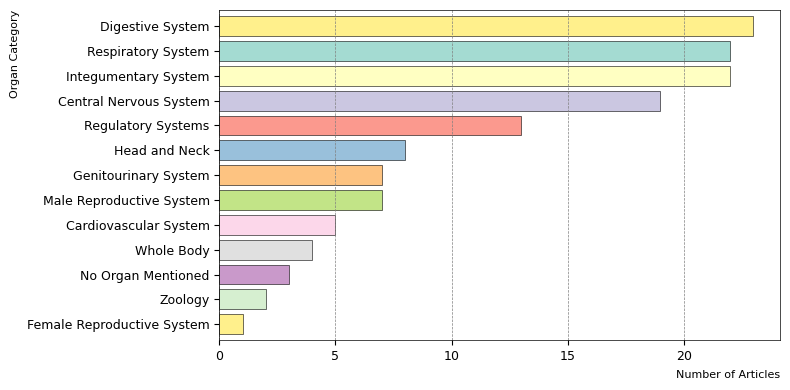

Plot saved to 05MICCAI_notebook_data_visualization/image_types.png


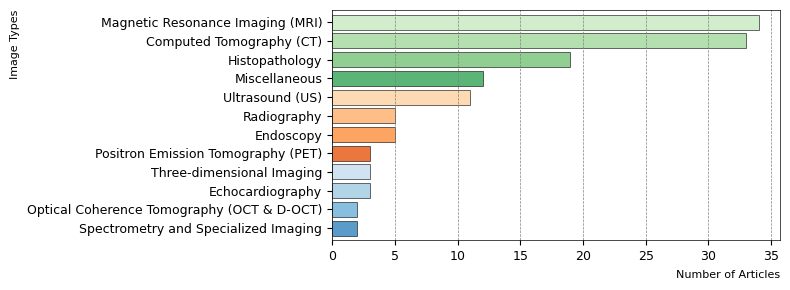

Plot saved to 05MICCAI_notebook_data_visualization/demographics_usage_percentage.png


/var/folders/bn/qvp15lc54w559qnxjpvy0bzw0000gn/T/ipykernel_88779/3103831220.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles = [mpatches.Rectangle((0,0),1,1, color=color_scheme[i % len(color_scheme)], edgecolor='black') for i in range(len(category_names))]


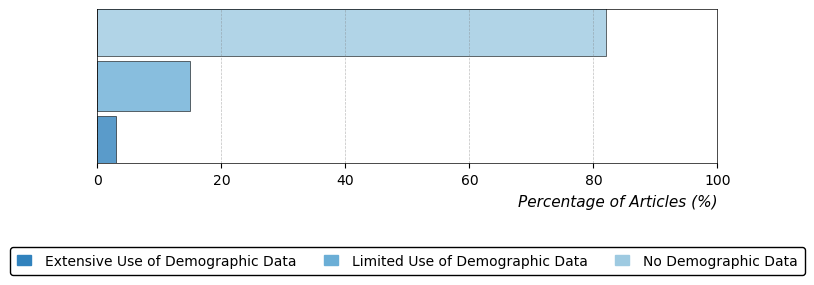

Plot saved to 05MICCAI_notebook_data_visualization/dataset_disclosure.png


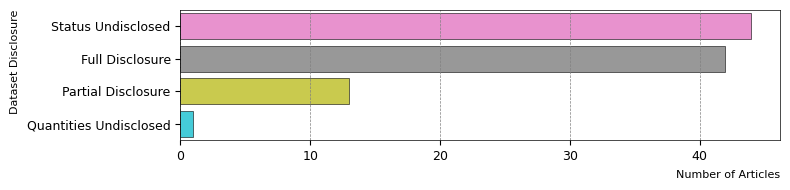

Plot saved to 05MICCAI_notebook_data_visualization/dataset_quantities.png


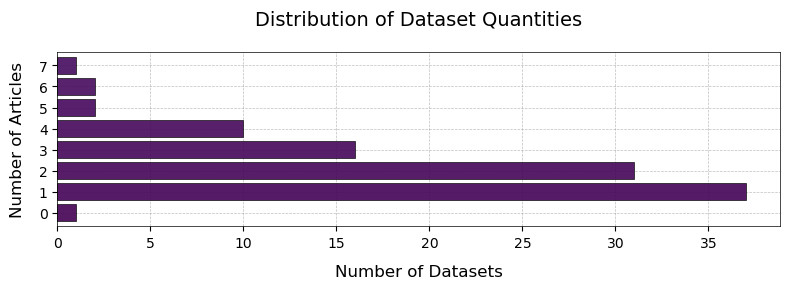

Plot saved to 05MICCAI_notebook_data_visualization/most_dataseta.png


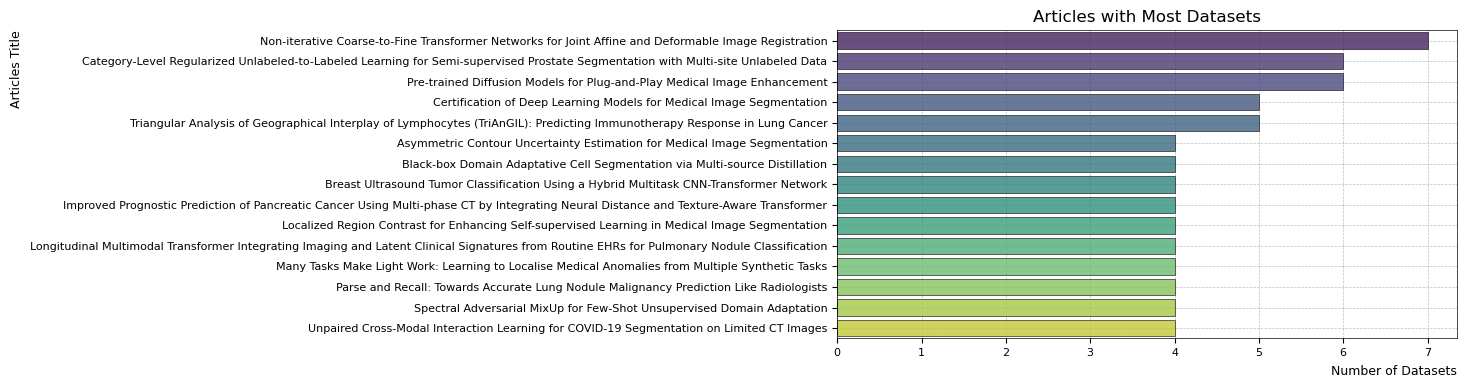

Plot saved to 05MICCAI_notebook_data_visualization/location_percentage_bar_chart.png


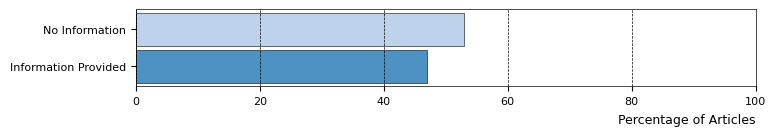

Plot saved to 05MICCAI_notebook_data_visualization/location_category_treemap.png


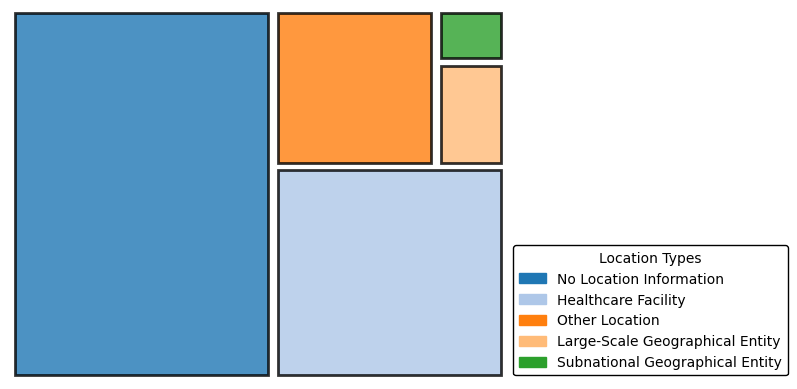

In [462]:
# Using the plotting function for organ categories
plot_distribution_organs(df1, 'organ_category_refined', (8, 4), 'organ_category_refined.png')

# Using the plotting function for image categories
plot_distribution_images(df1, 'image_category', (8, 3), 'image_type.png')

# Usage of the function for demographic analysis
# Applying demographic analysis and plotting its distribution
df1['demographics_usage'] = df1.apply(aggregate_demographics, axis=1)
plot_distribution_demographics_usage(df1)

# Usage of the functions for dataset disclosure and status
# Applying dataset disclosure and status analysis and plotting their distribution
df1['dataset_disclosure_category'] = df1.apply(categorize_disclosure, axis=1)
df1['dataset_status'] = df1.apply(categorize_dataset_status, axis=1)
plot_dataset_distribution(df1, 'dataset_disclosure_category')
plot_dataset_quantities(df1)

# Usage of the function for most datasets
plot_most_datasets(df1)

# Usage of the functions for location analysis
# Displaying initial location category data
plot_location_info_distribution(df1)
apply_and_plot_location_categories(df1)

In [463]:
# Summary statistics

# Count occurrences of preprocessed organ and image types
preprocessed_organ_counts = df1['organ_category_refined'].str.split(',').explode().str.strip().value_counts()
preprocessed_image_type_counts = df1['image_category'].str.split(',').explode().str.strip().value_counts()

# Compute and print summary statistics
compute_summary_statistics(df1)
compute_demographic_information(df1)
compute_organ_information(df1, organ_counts, unique_organs, preprocessed_organ_counts)
compute_image_information(df1, image_type_counts, unique_image_types, preprocessed_image_type_counts)

In [457]:
df1.to_csv(notebook_name + 'preprocessed_annotation_data.csv', index=False)

***
## Analysis of Preprocessed Annotation Data
***

In [356]:
def plot_demographic_distribution(df, save_path):
    """Plots the distribution of demographic categories in a given DataFrame."""
    # Define demographics categories
    demographics = ['age', 'sex/gender', 'ethnicity', 'geographical location ']

    # Filter out entries with 'No Demographic Data'
    df_filtered = df[df['demographics_usage'] != 'No Demographic Data']

    # Create dummy variables for demographics categories
    df_dummy_filtered = pd.get_dummies(df_filtered[demographics])

    # Summing up the dummies under each 'demographics_usage' category
    pivot_df = df_dummy_filtered.groupby(df_filtered['demographics_usage']).sum()

    # Define labels for the plot
    labels_demo = ['Age', 'Sex', 'Ethnicity', 'Geographical Location']

    # Plotting the data in a stacked bar chart format
    fig, ax = plt.subplots(figsize=(10, 3.6))
    pivot_df.plot(kind='barh', stacked=True, color=plt.cm.tab20_r.colors[5:], width=0.95, edgecolor='black', linewidth=0.5, alpha=0.8, ax=ax)

    # Customizing the plot appearance
    ax.set_ylabel('Demographic Usage', loc='top', fontsize=12, labelpad=15, style='italic')
    ax.set_xlabel('Distribution of Demographic Categories', loc='right', fontsize=12, labelpad=15, style='italic')
    ax.set_yticklabels(['Extensive Use', 'Limited Use'], fontsize=12, rotation=0, fontweight='bold', va='center')
    ax.grid(axis='x', linestyle='--')
    ax.set_ylim(-0.4, 1.4)

    # Setting the legend
    ax.legend(labels=labels_demo, bbox_to_anchor=(0.125, -0.65), loc='lower center', fontsize='11.5', title_fontsize='small', title='Demographic Categories', 
              shadow=False, fancybox=True, ncol=4, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5, labelspacing=0.3, handlelength=1.5, 
              handletextpad=0.5, handleheight=1.5)

    # Tight layout and save figure
    plt.tight_layout()
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

In [357]:
def analyze_organ_distribution_no_demographics(df, organ_column, demo_usage_column, save_path_base):
    """Analyzes and plots the distribution of organs where no demographic data is provided."""

    # Expand and explode the organ categories
    df[organ_column] = df[organ_column].str.split(', ')
    df_expanded = df.explode(organ_column)

    # Standardize organ names using a predefined mapping
    organ_mapping = {
        'colon': 'Colon', 'brain': 'Human Brain', 'human brain': 'Human Brain', 'cerebral': 'Human Brain',
        'breast': 'Breast', 'liver': 'Liver', 'lung': 'Lung', 'prostate': 'Prostate', 'pancreas': 'Pancreas',
        'kidney': 'Kidney', 'head': 'Head and Neck', 'neck': 'Head and Neck', 'abdomen': 'Stomach',
        'stomach': 'Stomach', 'chest': 'Chest', 'eye': 'Eye', 'gallbladder': 'Gallbladder', 'heart': 'Heart',
        'bladder': 'Bladder', 'skin': 'Skin', 'spleen': 'Spleen', 'thyroid': 'Thyroid', 'whole body': 'Whole Body',
        'no organ mentioned': 'No Organ Mentioned'
    }
    df_expanded[organ_column] = df_expanded[organ_column].map(organ_mapping).fillna(df_expanded[organ_column])

    # Filter for 'No Demographic Data'
    no_demo_data = df_expanded[df_expanded[demo_usage_column] == 'No Demographic Data']

    # Group by organ and count occurrences
    grouped_no_demo = no_demo_data.groupby(organ_column).size().reset_index(name='Count')
    grouped_no_demo_sorted = grouped_no_demo.sort_values('Count', ascending=False)

    #grouped_no_demo_sorted['Percentage'] = grouped_no_demo_sorted['Count'] / grouped_no_demo_sorted['Count'].sum() * 100


    # Plotting the details for 'No Demographic Data' with horizontal bars
    colors = plt.cm.Set3_r.colors
    
    plt.figure(figsize=(10, 3.5))
    #plt.barh(grouped_no_demo_sorted[organ_column], grouped_no_demo_sorted['Percentage'], color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
    plt.barh(grouped_no_demo_sorted[organ_column], grouped_no_demo_sorted['Count'], color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)

    plt.title('Distribution of Organs in Articles with No Demographic Data', fontsize=10, loc='center')
    
    #plt.xlabel('Percentage of Articles (%)', fontsize=10, labelpad=10, loc='right', style='italic')
    plt.xlabel('Number of Articles', fontsize=9.5, labelpad=10, loc='right', style='italic')
    plt.ylabel('Main Organ Category', fontsize=9.5, labelpad=10, loc='bottom', style='italic')
    
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    #plt.xticks(range(0, int(20) + 1, 5))

    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    
    #plt.savefig(f'{save_path_base}_no_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, f'{save_path_base}_no_demographic_data.png') # Save the plot to the plots folder
    plt.show()

In [358]:
def analyze_organ_distribution_extensive_use_demographics(df, organ_column, demo_usage_column, save_path_base):
    """Analyzes and plots the distribution of organs where extensive demographic data is provided."""

    # Expand and explode the organ categories
    df[organ_column] = df[organ_column].str.split(', ')
    df_expanded = df.explode(organ_column)

    # Standardize organ names using a predefined mapping
    organ_mapping = {
        'colon': 'Colon', 'brain': 'Human Brain', 'human brain': 'Human Brain', 'cerebral': 'Human Brain',
        'breast': 'Breast', 'liver': 'Liver', 'lung': 'Lung', 'prostate': 'Prostate', 'pancreas': 'Pancreas',
        'kidney': 'Kidney', 'head': 'Head and Neck', 'neck': 'Head and Neck', 'abdomen': 'Stomach',
        'stomach': 'Stomach', 'chest': 'Chest', 'eye': 'Eye', 'gallbladder': 'Gallbladder', 'heart': 'Heart',
        'bladder': 'Bladder', 'skin': 'Skin', 'spleen': 'Spleen', 'thyroid': 'Thyroid', 'whole body': 'Whole Body',
        'no organ mentioned': 'No Organ Mentioned'
    }
    df_expanded[organ_column] = df_expanded[organ_column].map(organ_mapping).fillna(df_expanded[organ_column])

    # Filter for 'Extensive Demographic Data'
    extensive_demo_data = df_expanded[df_expanded[demo_usage_column] == 'Extensive Use of Demographic Data']

    # Group by organ and count occurrences
    grouped_extensive_demo = extensive_demo_data.groupby(organ_column).size().reset_index(name='Count')
    grouped_extensive_demo_sorted = grouped_extensive_demo.sort_values('Count', ascending=False)
    #grouped_extensive_demo_sorted['Percentage'] = grouped_extensive_demo_sorted['Count'] / grouped_extensive_demo_sorted['Count'].sum() * 100


    # Plotting the details for 'Extensive Demographic Data' with horizontal bars
    colors = plt.cm.Set3_r.colors
    plt.figure(figsize=(10, 3.))
    
    #plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Percentage'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
    plt.barh(grouped_extensive_demo_sorted[organ_column], grouped_extensive_demo_sorted['Count'], color=colors,edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)

    plt.title('Distribution of Organs in Articles with Extensive Use of Demographic Data', fontsize=10, loc='center')
    #plt.xlabel('Percentage of Articles (%)', fontsize=10, labelpad=10, loc='right', style='italic')
    plt.xlabel('Number of Articles', fontsize=9.5, labelpad=10, loc='right', style='italic')
    plt.ylabel('Main Organ Category', fontsize=9.5, labelpad=10, loc='bottom', style='italic')
    
    plt.xticks(fontsize=9)
    plt.yticks(fontsize=9)
    #plt.xticks(range(0, int(3) + 1, 1))

    plt.grid(axis='x', linestyle='--')
    plt.tight_layout()
    
    #plt.savefig(f'{save_path_base}_extensive_use_of_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, f'{save_path_base}_extensive_use_of_demographic_data.png') # Save the plot to the plots folder
    plt.show()

In [359]:
def plot_organ_distribution_by_demographics(df, organ_column, demo_usage_column, save_path):
    """
    Plots a stacked bar chart of the distribution of organ categories across different demographic usage.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    organ_column (str): The column name for the organ categories.
    demo_usage_column (str): The column name for demographic usage.
    save_path (str): The path to save the plot image.
    """

    # Expand the 'organ_category_refined' to separate rows for each category
    df_expanded = df.drop(organ_column, axis=1).join(df[organ_column].str.split(', ').explode().reset_index(drop=True))

    # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
    grouped = df_expanded.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

    # Pivot data to get 'organ_category_refined' categories as columns filled with counts
    pivot_df = grouped.pivot_table(index=demo_usage_column, columns=organ_column, values='Count', fill_value=0)

    # Plotting the horizontal stacked bar chart
    colors = plt.cm.Set3_r.colors

    # Plotting the horizontal stacked bar chart
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.8)
    
    plt.ylabel('Distribution of Organs', fontsize=10, labelpad=10, loc='top', style='italic').set_visible(True)
    plt.xlabel('Demographics Usage', fontsize=10, labelpad=10, loc='right', style='italic' ).set_visible(True)
    
    ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold', va='top')
    plt.legend(loc='upper left', fontsize='12.5', shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
               labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
    
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlim(-0.49, 2.49)
    
    plt.grid(axis='x', linestyle='--')
    
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

In [360]:
from cProfile import label

def plot_image_distribution_by_demographics(df, image_column, demo_usage_column, save_path):
    """
    Plots a stacked bar chart of the distribution of image types categories across different demographic usage.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    image_column (str): The column name for the organ categories.
    demo_usage_column (str): The column name for demographic usage.
    save_path (str): The path to save the plot image.
    """

    # Expand the 'image_col' to separate rows for each category
    df_expanded = df.drop(image_column, axis=1).join(df[image_column].str.split(', ').explode().reset_index(drop=True))

    # Group by 'demographics_usage' and the expanded 'image_col', then count each group
    grouped = df_expanded.groupby([demo_usage_column, image_column]).size().reset_index(name='Count')

    # Pivot data to get 'organ_category_refined' categories as columns filled with counts
    pivot_df = grouped.pivot_table(index=demo_usage_column, columns=image_column, values='Count', fill_value=0)

    # Plotting the horizontal stacked bar chart
    colors = plt.cm.tab20c.colors  # Or any other colormap that you like

    # Plotting the horizontal stacked bar chart
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.8)

    plt.ylabel('Distribution of Image Types', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
    plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
    
    ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
    plt.xlim(-0.49, 2.49)
    
    plt.legend(fontsize='12.5', loc='upper left', shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
               labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
    
    plt.grid(axis='x', linestyle='--')
    
    #plt.savefig('image_types_by_demographics.png', dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

In [361]:
def plot_location_distribution_by_demographics(df, demo_column, location_column, save_path):
    """
    Plots a stacked bar chart of the distribution of location categories across different demographic usages.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    demo_column (str): The column name for the demographic usages.
    location_column (str): The column name for the location categories.
    save_path (str): The path to save the plot image.
    """
    colors = plt.cm.Accent_r.colors[3:]

    # Group by 'Demographic' and 'Location', then count each group
    grouped = df.groupby([demo_column, location_column]).size().reset_index(name='Count')

    # Pivot data to get 'Location' categories as columns filled with counts
    pivot_df = grouped.pivot_table(index=demo_column, columns=location_column, values='Count', fill_value=0)

    # Plotting
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.8)

    plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic')
    plt.ylabel('Distribution of Location Types', fontsize=12, labelpad=15, loc='top', style='italic')
    
    ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
    plt.xlim(-0.5, len(pivot_df.index)-0.5)
    
    plt.legend(loc='upper left', fontsize='12.5', title_fontsize='small', shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', 
               framealpha=1, borderpad=0.5, labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
    
    plt.grid(axis='x', linestyle='--')
    
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

In [362]:
def plot_dataset_disclosure_by_demographics(df, demo_column, disclosure_column, save_path):
    """
    Plots a horizontal stacked bar chart showing the distribution of dataset disclosure categories across demographic usage types.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    demo_column (str): The column name for demographic usages.
    disclosure_column (str): The column name for dataset disclosure categories.
    save_path (str): The path to save the plot image.
    """
    colors = plt.cm.tab10_r.colors

    # Group by demographic usage and dataset disclosure categories, then count each group
    grouped = df.groupby([demo_column, disclosure_column]).size().reset_index(name='Count')

    # Pivot data to get dataset disclosure categories as columns filled with counts
    pivot_df = grouped.pivot_table(index=demo_column, columns=disclosure_column, values='Count', fill_value=0)

    # Plotting
    ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 3), color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.5)

    plt.xlabel('Distribution of Dataset Disclosure', fontsize=12, labelpad=15, loc='right', style='italic')
    plt.ylabel('Demographic Usage', fontsize=12, labelpad=15, loc='top', style='italic')
    
    ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
    plt.ylim(-0.49, len(pivot_df.index)-0.49)
    
    plt.legend(bbox_to_anchor=(0.33, -0.15), fontsize='11.5', shadow=False, fancybox=True, ncol=2, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
               labelspacing=0.3, handlelength=1., handletextpad=0.5, handleheight=1.)
    
    plt.grid(axis='x', linestyle='--')
    
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

In [625]:
def plot_dataset_quantity_by_demographics(df, demo_column, dataset_column, save_path):
    """
    Plots a bar chart showing the distribution of the number of datasets used by papers, categorized by demographics usage.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    demo_column (str): The column name for demographic usages.
    dataset_column (str): The column name for dataset quantity.
    save_path (str): The path to save the plot image.
    """
    colors = plt.cm.tab20c_r.colors[5:]

    # Group by demographic usage and dataset quantity, then count each group
    #grouped = df.groupby([demo_column, dataset_column]).size().reset_index(name='Count')
    grouped = df.groupby([dataset_column, demo_column]).size().reset_index(name='Count')


    # Pivot data to get dataset quantities as columns filled with counts
    #pivot_df = grouped.pivot_table(index=demo_column, columns=dataset_column, values='Count', fill_value=0)
    pivot_df = grouped.pivot_table(index=dataset_column, columns=demo_column, values='Count', fill_value=0)

    # Dataset quantity labels
    #dataset_labels = [f'{i} Dataset' if i == 1 else f'{i} Datasets' for i in range(1, 8)]
    dataset_labels = [f'{i} Dataset' for i in range(1, 8)]

    # Plotting
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(7, 5), color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.6)

    plt.xlabel('Quantity Of Dataset Used Per Article', fontsize=10, labelpad=15, loc='right', style='italic')
    plt.ylabel('Count', fontsize=10, labelpad=15, loc='top', style='italic')
    #plt.ylabel('Distribution of Datasets', fontsize=12, labelpad=15, loc='top', style='italic')
    
    #ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
    plt.xlim(-0.49, len(pivot_df.index)-0.49)
   
    plt.legend(loc='upper right', fontsize='11.5', shadow=False, fancybox=True, ncol=1, frameon=True, 
               edgecolor='black', framealpha=1, borderpad=0.5,labelspacing=0.5, handlelength=1.5, handletextpad=0.5, handleheight=1.5)
    
    plt.grid(axis='x', linestyle='--')
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

In [657]:
import matplotlib.pyplot as plt

def plot_dataset_quantity_by_demographics_2(df, demo_column, dataset_column, save_path):
    """
    Plots a bar chart showing the distribution of the number of datasets used by papers, categorized by demographics usage.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    demo_column (str): The column name for demographic usages.
    dataset_column (str): The column name for dataset quantity.
    save_path (str): The path to save the plot image.
    """
    colors = plt.cm.tab20c_r.colors[5:]

    # Group by demographic usage and dataset quantity, then count each group
    grouped = df.groupby([demo_column, dataset_column]).size().reset_index(name='Count')

    # Pivot data to get demographic usages as rows and dataset quantities as columns
    pivot_df = grouped.pivot_table(index=demo_column, columns=dataset_column, values='Count', fill_value=0)
    # Assuming 'pivot_df' is your DataFrame from the previous steps
    fig, ax = plt.subplots(figsize=(7, 5))
    colors = plt.cm.viridis(np.linspace(0, 1, pivot_df.shape[1]))  # Using a viridis color map for better color distribution

    #pivot_df.plot(kind='bar', stacked=True, color=colors, ax=ax, width=0.95, edgecolor='black', linewidth=0.5)

    # Plotting
    pivot_df.plot(kind='bar', stacked=True, ax=ax, color=colors[:pivot_df.shape[1]], width=0.95, edgecolor='black', linewidth=0.5, alpha=0.9)

    #plt.xlabel('Quantity Of Dataset Used Per Article', fontsize=10, labelpad=15, loc='right', style='italic')
    plt.xlabel('Demographic Usage', fontsize=10, labelpad=15, loc='right', style='italic')
    plt.ylabel('Count', fontsize=10, labelpad=15, loc='top', style='italic')

    
    # Dynamically create dataset labels based on the unique dataset quantities
    dataset_labels = [f'{i} Dataset' if i == 1 else f'{i} Datasets' for i in sorted(pivot_df.columns)]
    ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')

    plt.legend(title="Number of Datasets", labels=dataset_labels, loc='upper left', fontsize='11.5', shadow=False, fancybox=True, ncol=1, frameon=True,
               edgecolor='black', framealpha=1, borderpad=0.5, labelspacing=0.5, handlelength=1.5, handletextpad=0.5, handleheight=1.5)

    # Adding grid lines
    ax.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)
    ax.set_axisbelow(True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

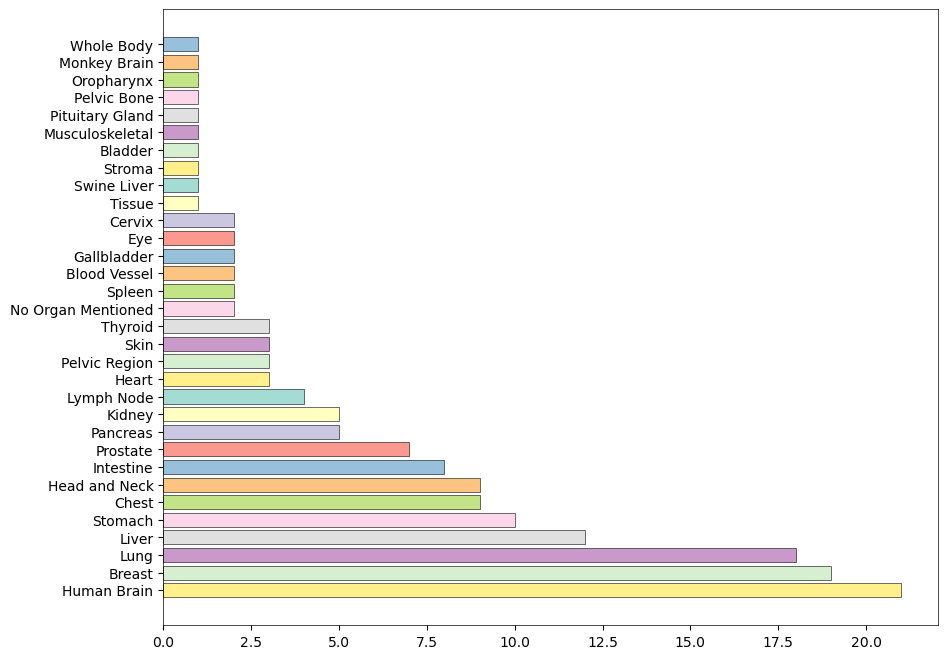

In [658]:
# Group dataset quantities by individual organ usage
df1['organ_types'] = df1['organ/body part in datasets'].str.strip('[]').str.replace("'", "").str.split(', ')
df_expanded = df1.explode('organ_types')

# Replace organ names in the DataFrame with standardized names using the mapping
df_expanded['organ_types'] = df_expanded['organ_types'].apply(lambda x: organ_mapping.get(x, x))

# Filter the data for 'No Demographic Data'
no_demo_data = df_expanded[df_expanded['dataset quantity'] != 0]

# Regroup by 'organ_types' and count occurrences
grouped_no_demo = no_demo_data.groupby('organ_types').size().reset_index(name='Count')

# Sort the DataFrame based on 'Count' to make the plot more readable
grouped_no_demo_sorted = grouped_no_demo.sort_values('Count', ascending=False)

# Converting the counts into percentages
plt.figure(figsize=(10,8))  
plt.barh(grouped_no_demo_sorted['organ_types'], grouped_no_demo_sorted['Count'], color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
plt.show()

In [659]:
# Read the cleaned annotation data
filename = notebook_name + 'preprocessed_annotation_data.csv'
df1 = pd.read_csv(filename)

### Distribution of Organ Categories and Individual Organs By Demographic Usage
***

In [660]:
organ_mapping = {
    'cervical': 'Cervix',
    'head and neck ': 'Head and Neck',
    'oropharynx': 'Oropharynx',
    'colon': 'Intestine',
    'colon\\n\\n\\n': 'Intestine',
    'colon\n\n\n\n': 'Intestine',
    'colon\n\n\n': 'Intestine',
    'colorectal': 'Intestine',
    'colorectal ': 'Intestine',
    'colon  ': 'Intestine',
    'brain': 'Human Brain',
    'brain ': 'Human Brain',
    'human brain': 'Human Brain',
    'cerebral': 'Human Brain',
    'monkey brain': 'Monkey Brain',
    'breast': 'Breast',
    'liver': 'Liver',
    'lung': 'Lung',
    'prostate': 'Prostate',
    'pancreas': 'Pancreas',
    'kidney': 'Kidney',
    'renal': 'Kidney',
    'hepatic vein': 'Liver',
    'hepatic': 'Liver',
    'head': 'Head and Neck',
    'neck': 'Head and Neck',
    'head and neck': 'Head and Neck',
    'h&n': 'Head and Neck',
    'abdomen': 'Stomach',
    'stomach': 'Stomach',
    'chest': 'Chest',
    'eye': 'Eye',
    'gallbladder': 'Gallbladder',
    'heart': 'Heart',
    'cardiac': 'Heart',
    'bladder': 'Bladder',
    'lymp nodes': 'Lymph Node',
    'lymp node': 'Lymph Node',
    'lymph node': 'Lymph Node',
    'pelvic region': 'Pelvic Region',
    'pelvic': 'Pelvic Region',
    'pelvis': 'Pelvic Region',
    'skin': 'Skin',
    'spleen': 'Spleen',
    'swine liver': 'Swine Liver',
    'thyroid': 'Thyroid',
    'whole body': 'Whole Body',
    'no organ mentioned': 'No Organ Mentioned',
    'femoral head': 'Pelvic Bone',
    'thorax': 'Chest',
    'rectum': 'Intestine',
    'colorectum': 'Intestine',
    'cervix': 'Cervix',
    'small intestine': 'Intestine',
    'pituitary gland': 'Pituitary Gland',
    'stroma': 'Stroma',
    'tissue': 'Tissue',
    'arterial': 'Blood Vessel',
    'blood vessels': 'Blood Vessel',
    'None': 'No Organ Mentioned',
}

Plot saved to 05MICCAI_notebook_data_visualization/demographics_stacked_bar_chart.png


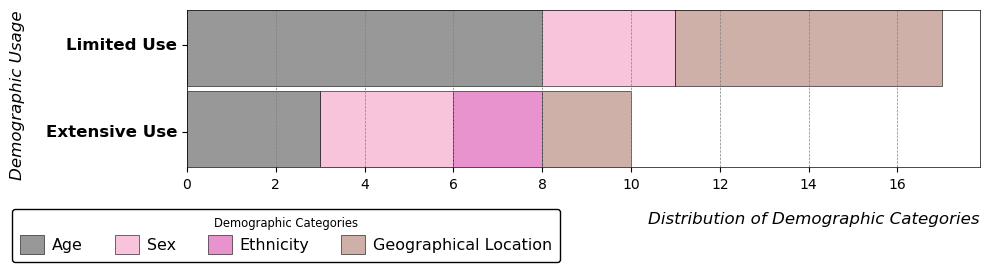

Plot saved to 05MICCAI_notebook_data_visualization/organs_distribution_no_demographic_data.png


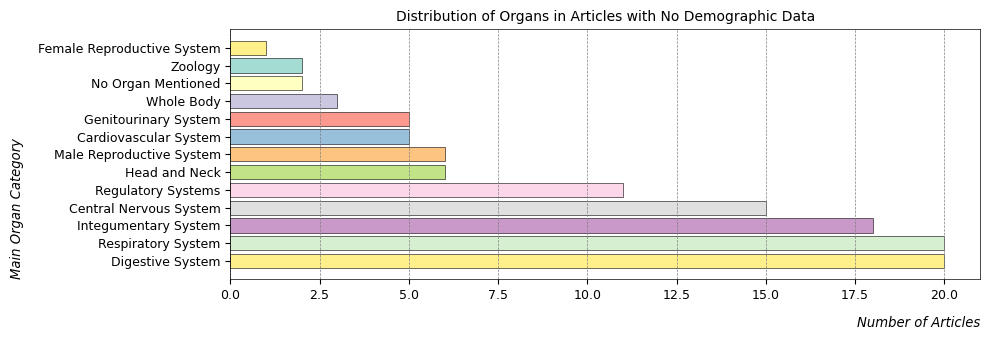

Plot saved to 05MICCAI_notebook_data_visualization/organs_distribution_extensive_use_of_demographic_data.png


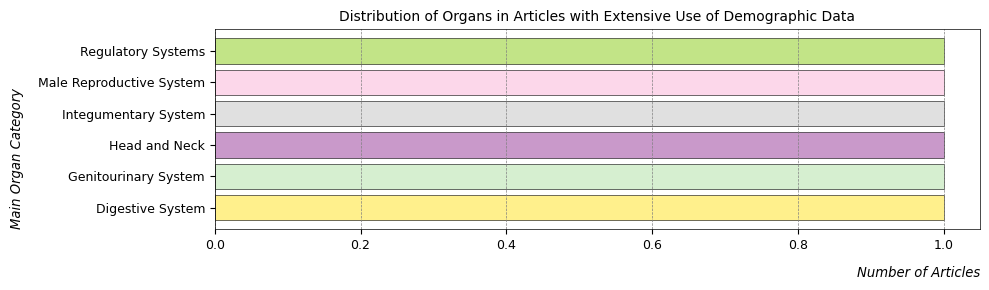

In [661]:
# Usage of the function for demographic analysis
plot_demographic_distribution(df1, 'demographics_stacked_bar_chart.png')

# Usage of the function for organ distribution analysis
analyze_organ_distribution_no_demographics(df1, 'organ_category_refined', 'demographics_usage', 'organs_distribution')


# Read the cleaned annotation data
df1 = pd.read_csv(filename)
analyze_organ_distribution_extensive_use_demographics(df1, 'organ_category_refined', 'demographics_usage', 'organs_distribution')

In [662]:
# Prepare 'organ_types' by removing brackets and quotes, then splitting and exploding
df1['organ_types'] = df1['organ/body part in datasets'].str.strip('[]').str.replace("'", "").str.split(', ')
df_expanded = df1.explode('organ_types')

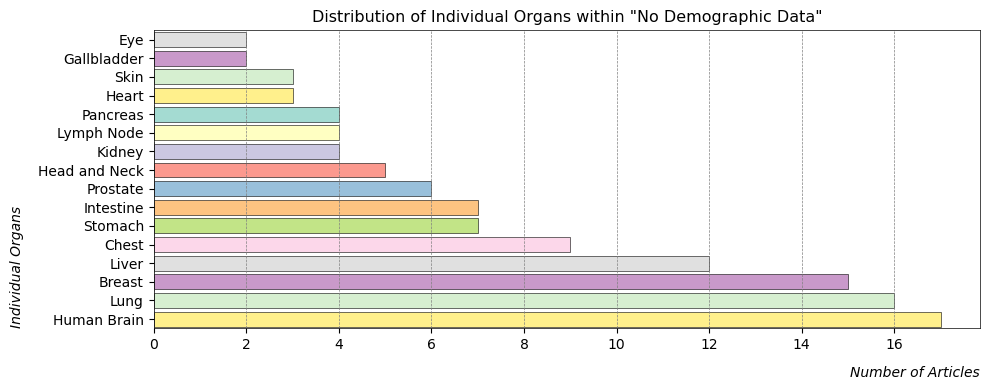

In [663]:
# Group by 'organ_types' (individual organs) and count occurrences for 'No Demographic Data'
# Replace organ names in the DataFrame with standardized names using the mapping
df_expanded['organ_types'] = df_expanded['organ_types'].apply(lambda x: organ_mapping.get(x, x))

# Filter the data for 'No Demographic Data'
no_demo_data = df_expanded[df_expanded['demographics_usage'] == 'No Demographic Data']

# Regroup by 'organ_types' and count occurrences
grouped_no_demo = no_demo_data.groupby('organ_types').size().reset_index(name='Count')

# Sort the DataFrame based on 'Count' to make the plot more readable
grouped_no_demo_sorted = grouped_no_demo.sort_values('Count', ascending=False)

# Converting the counts into percentages
# 
# grouped_no_demo_sorted['Percentage'] = grouped_no_demo_sorted['Count'] / grouped_no_demo_sorted['Count'].sum() * 100
# print(grouped_no_demo_sorted['Percentage'].sum()) checking if the total gives 100%

# Plotting the details for 'No Demographic Data' with horizontal bars for individual organs
colors = plt.cm.Set3_r.colors  
plt.figure(figsize=(10,4))  
#plt.barh(grouped_no_demo_sorted['organ_types'], grouped_no_demo_sorted['Percentage'], color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
plt.barh(grouped_no_demo_sorted['organ_types'], grouped_no_demo_sorted['Count'], color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
plt.title('Distribution of Individual Organs within "No Demographic Data"', fontsize=11.5, loc='center')
#plt.xlabel('Percentage of Articles (%)', fontsize=10, labelpad=10, loc='right', style='italic')
plt.xlabel('Number of Articles', fontsize=10, labelpad=10, loc='right', style='italic')
plt.ylabel('Individual Organs', fontsize=10, labelpad=10, loc='bottom', style='italic')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(-0.5, 15.5)  
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  
plt.savefig('individual_organs_no_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

Plot saved to 05MICCAI_notebook_data_visualization/individual_organs_extensive_demographic_data.png


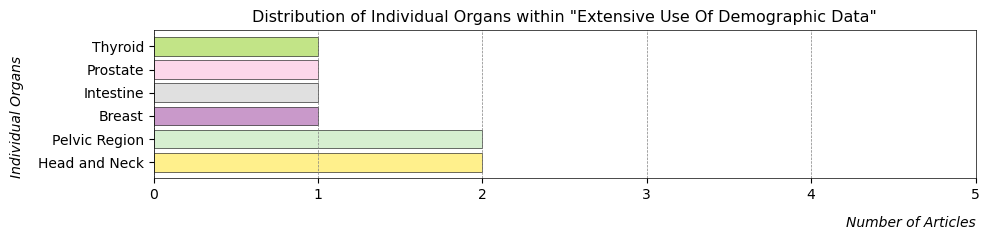

In [664]:
# Group by 'organ_types' (individual organs) and count occurrences for 'Extensive Use Of Demographic Data'
# Replace organ names in the DataFrame with standardized names using the mapping

# Replace organ names in the DataFrame with standardized names using the mapping
df_expanded['organ_types'] = df_expanded['organ_types'].apply(lambda x: organ_mapping.get(x, x))

# Filter the data for 'Extensive Use of Demographic Data'
extensive_demo_data = df_expanded[df_expanded['demographics_usage'] == 'Extensive Use of Demographic Data']

# Regroup by 'organ_types' and count occurrences
grouped_extensive_demo = extensive_demo_data.groupby('organ_types').size().reset_index(name='Count')

# Sort the DataFrame based on 'Count' to make the plot more readable
grouped_extensive_demo_sorted = grouped_extensive_demo.sort_values('Count', ascending=False)

# Plotting the details for 'Extensive Use Of Demographic Data' with horizontal bars for individual organs
colors = plt.cm.Set3_r.colors  # Or any other colormap that you like
plt.figure(figsize=(10,2.5))  # Adjust the figure size as needed
plt.barh(grouped_extensive_demo_sorted['organ_types'], grouped_extensive_demo_sorted['Count'], color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
plt.title('Distribution of Individual Organs within "Extensive Use Of Demographic Data"', fontsize=11.5, loc='center')
plt.xlabel('Number of Articles', fontsize=10, labelpad=10, loc='right', style='italic')
plt.ylabel('Individual Organs', fontsize=10, labelpad=10, loc='bottom', style='italic')
plt.xlim(0, 5)  # Adjust the x-axis limits to fit all categories
plt.xticks(fontsize=10, color='black')
plt.yticks(fontsize=10, color='black')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  
#plt.savefig('individual_organs_extensive_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
save_plot_to_folder(plt, 'individual_organs_extensive_demographic_data.png') # Save the plot to the plots folder
plt.show()

Plot saved to 05MICCAI_notebook_data_visualization/individual_organs_limited_demographic_data.png


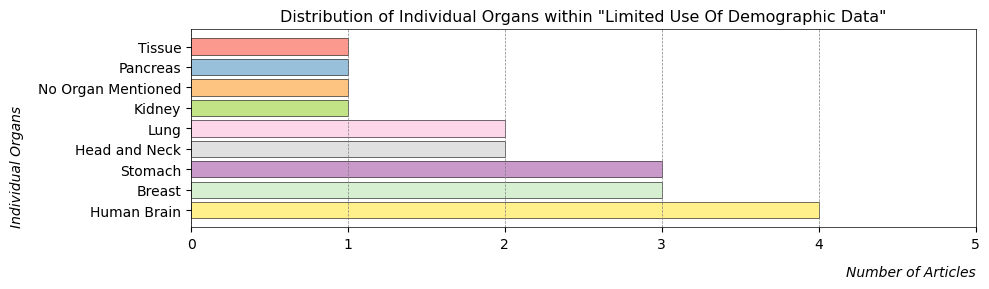

In [665]:
# Group by 'organ_types' (individual organs) and count occurrences for 'Limited Use Of Demographic Data'
# Replace organ names in the DataFrame with standardized names using the mapping
df_expanded['organ_types'] = df_expanded['organ_types'].apply(lambda x: organ_mapping.get(x, x))

# Filter the data for 'Limited Use of Demographic Data'
limited_demo_data = df_expanded[df_expanded['demographics_usage'] == 'Limited Use of Demographic Data']

# Regroup by 'organ_types' and count occurrences
grouped_limited_demo = limited_demo_data.groupby('organ_types').size().reset_index(name='Count')

# Sort the DataFrame based on 'Count' to make the plot more readable
grouped_limited_demo_sorted = grouped_limited_demo.sort_values('Count', ascending=False)

# Plotting the details for 'Limited Use Of Demographic Data' with horizontal bars for individual organs
colors = plt.cm.Set3_r.colors  
plt.figure(figsize=(10, 3))  
plt.barh(grouped_limited_demo_sorted['organ_types'], grouped_limited_demo_sorted['Count'], color=colors, edgecolor='black', linewidth=0.5, alpha=0.8, height=0.8)
plt.title('Distribution of Individual Organs within "Limited Use Of Demographic Data"', fontsize=11.5, loc='center')
plt.xlabel('Number of Articles', fontsize=10, labelpad=10, loc='right', style='italic')
plt.ylabel('Individual Organs', fontsize=10, labelpad=10, loc='bottom', style='italic')
plt.xlim(0, 5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--')
plt.tight_layout()  
#plt.savefig('individual_organs_limited_demographic_data.png', dpi=300, bbox_inches='tight', transparent=True)
save_plot_to_folder(plt, 'individual_organs_limited_demographic_data.png') # Save the plot to the plots folder
plt.show()


Plot saved to 05MICCAI_notebook_data_visualization/organs_by_demographics.png


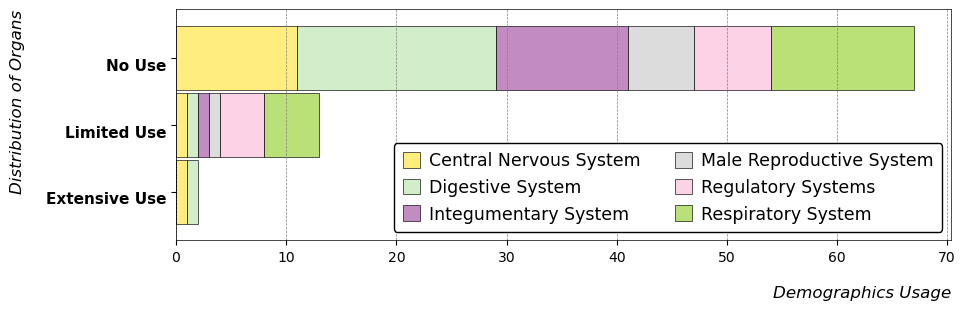

Plot saved to 05MICCAI_notebook_data_visualization/image_by_demographics.png


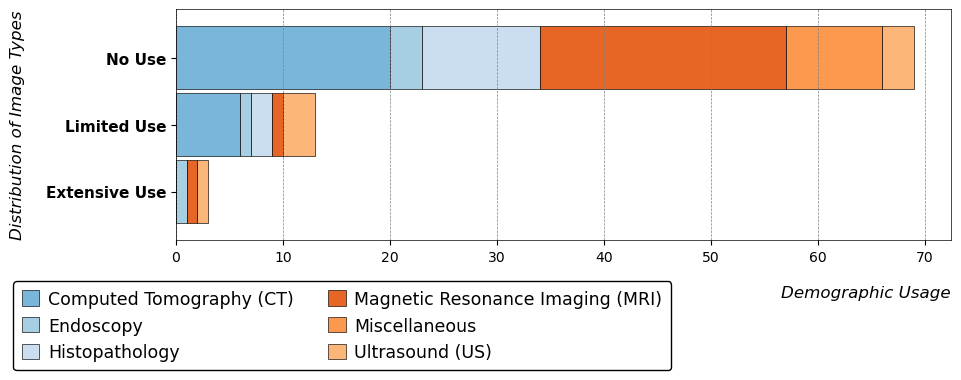

Plot saved to 05MICCAI_notebook_data_visualization/location_types_by_demographics.png


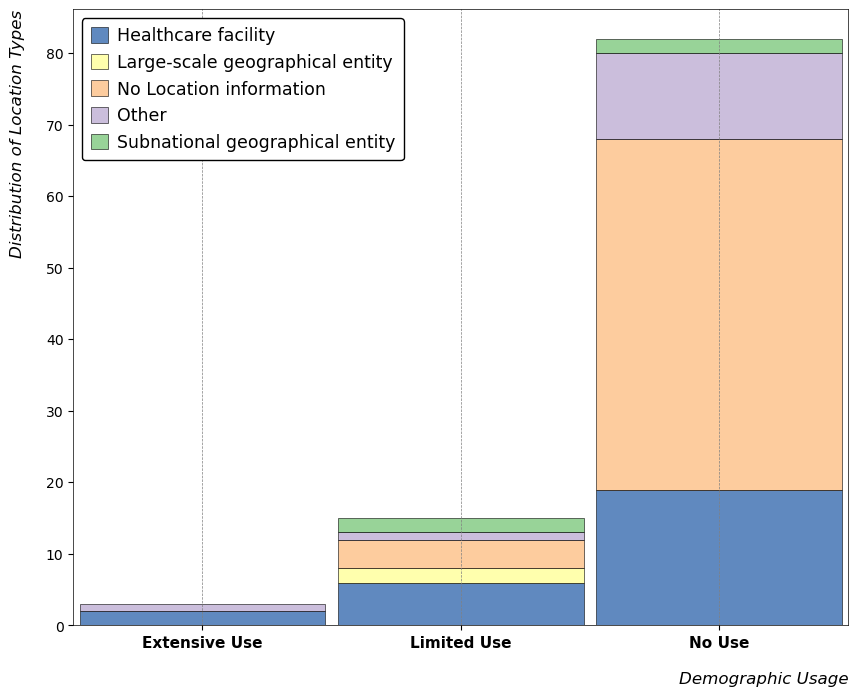

Plot saved to 05MICCAI_notebook_data_visualization/dataset_disclosure_by_demographics.png


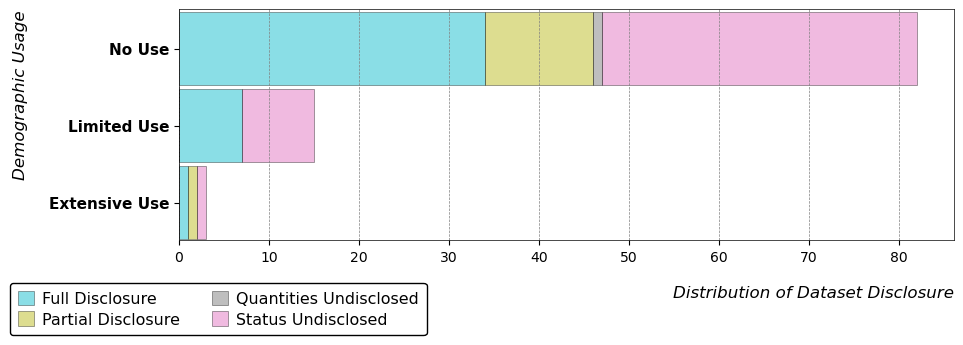

Plot saved to 05MICCAI_notebook_data_visualization/dataset_quantity_by_demographics_.png


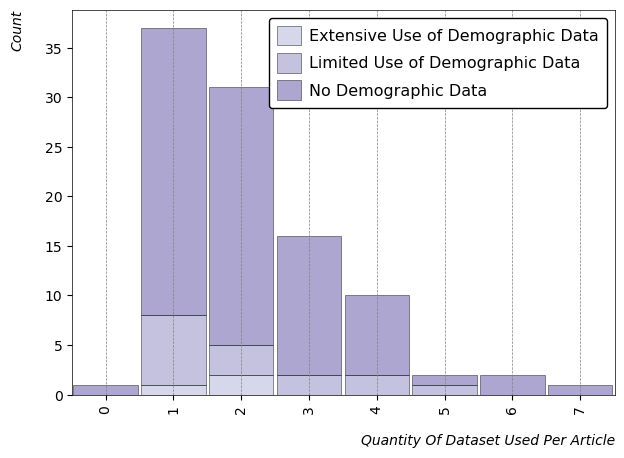

Plot saved to 05MICCAI_notebook_data_visualization/dataset_quantity_by_demographics_2.png


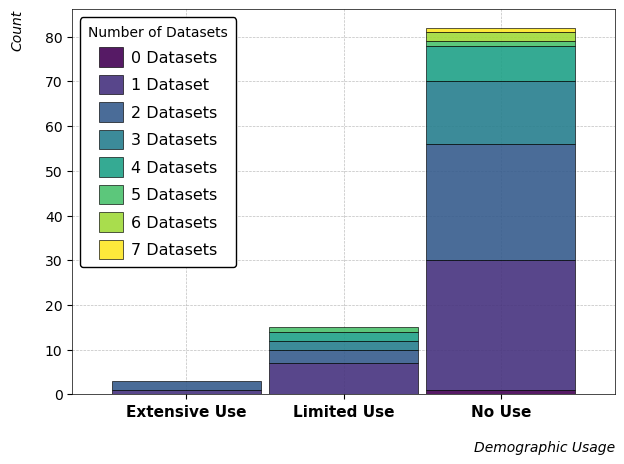

In [686]:
# Read the cleaned annotation data
df1 = pd.read_csv(filename)

# Usage of the function for organ distribution analysis
plot_organ_distribution_by_demographics(df1, 'organ_category_refined', 'demographics_usage', 'organs_by_demographics.png')

# Usage of the function for organ distribution analysis
plot_image_distribution_by_demographics(df1, 'image_category', 'demographics_usage', 'image_by_demographics.png')

# Usage of the function for location distribution analysis
plot_location_distribution_by_demographics(df1, 'demographics_usage', 'location_category', 'location_types_by_demographics.png')
# Usage of the function for dataset disclosure analysis
plot_dataset_disclosure_by_demographics(df1, 'demographics_usage', 'dataset_disclosure_category', 'dataset_disclosure_by_demographics.png')

# Usage of the function for dataset quantity analysis
plot_dataset_quantity_by_demographics(df1, 'demographics_usage', 'dataset quantity', 'dataset_quantity_by_demographics_.png')

plot_dataset_quantity_by_demographics_2(df1, 'demographics_usage', 'dataset quantity', 'dataset_quantity_by_demographics_2.png')


***
## Aggregating Categories for Better Readability of Plot
***

In [687]:
def plot_organ_distribution_by_demographics(df, organ_column, demo_usage_column, save_path):
    """
    Plots a stacked bar chart of the distribution of organ categories across different demographic usage.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    organ_column (str): The column name for the organ categories.
    demo_usage_column (str): The column name for demographic usage.
    save_path (str): The path to save the plot image.
    """

    # Expand the 'organ_category_refined' to separate rows for each category
    df_expanded = df.drop(organ_column, axis=1).join(df[organ_column].str.split(', ').explode().reset_index(drop=True))

    # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
    grouped = df_expanded.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

    # Find the top 5 organ types
    top_organ_types = df_expanded[organ_column].value_counts().head(6).index.tolist()

    # Filter the DataFrame for only the top 5 organ types
    df_top_organ_types = df_expanded[df_expanded[organ_column].isin(top_organ_types)]

    # Group by 'demographic_usage' and the filtered 'organ_column', then count each group
    grouped = df_top_organ_types.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

    # Pivot data to get 'organ_column' categories as columns filled with counts
    pivot_df = grouped.pivot_table(index=demo_usage_column, columns=organ_column, values='Count', fill_value=0)

    # Plotting the horizontal stacked bar chart
    colors = plt.cm.Set3_r.colors

    # Plotting the horizontal stacked bar chart
    ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 3), color=colors, width=0.95,edgecolor='black', linewidth=0.5, alpha=0.9)
    
    plt.ylabel('Distribution of Organs', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
    plt.xlabel('Demographics Usage', fontsize=12, labelpad=15, loc='right', style='italic' ).set_visible(True)
    
    ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold', va='top')
    
    plt.legend(loc='lower right', fontsize='12.5',shadow=False, fancybox=True, ncol=2, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
               labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
    
    plt.grid(axis='x', linestyle='--')
    
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

# def plot_organ_distribution_by_demographics(df, organ_column, demo_usage_column, save_path):
#     """
#     Plots a stacked bar chart of the distribution of organ categories across different demographic usage.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     organ_column (str): The column name for the organ categories.
#     demo_usage_column (str): The column name for demographic usage.
#     save_path (str): The path to save the plot image.
#     """

#     # Expand the 'organ_category_refined' to separate rows for each category
#     df_expanded = df.drop(organ_column, axis=1).join(
#         df[organ_column].str.split(', ').explode().reset_index(drop=True))

#     # Group by 'demographics_usage' and the expanded 'organ_category_refined', then count each group
#     grouped = df_expanded.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

#     # Find the top 5 organ types
#     top_image_types = df_expanded[organ_column].value_counts().head(5).index.tolist()

#     # Filter the DataFrame for only the top 5 organ types
#     df_top_image_types = df_expanded[df_expanded[organ_column].isin(top_image_types)]

#     # Group by 'demographic_usage' and the filtered 'organ_column', then count each group
#     grouped = df_top_image_types.groupby([demo_usage_column, organ_column]).size().reset_index(name='Count')

#     # Pivot data to get 'organ_column' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_usage_column, columns=organ_column, values='Count', fill_value=0)

#     # Plotting the horizontal stacked bar chart
#     colors = plt.cm.Set3_r.colors

#     # Plotting the horizontal stacked bar chart
#     ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95,
#                 edgecolor='black', linewidth=0.5, alpha=0.9)
#     plt.ylabel('Distribution of Organs', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
#     plt.xlabel('Demographics Usage', fontsize=12, labelpad=15, loc='right', style='italic' ).set_visible(True)
#     ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold', va='top')
#     plt.legend(loc='upper left', fontsize='12.5',
#               shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#               labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
#     plt.yticks(fontsize=9)
#     plt.xlim(-0.49, 2.49)
#     plt.grid(axis='x', linestyle='--')
#     plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
#     plt.show()

In [688]:
import matplotlib.ticker as ticker

def plot_image_distribution_by_demographics(df, image_column, demo_usage_column, save_path):
    """
    Plots a stacked bar chart of the top 5 image types categories across different demographic usage.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    image_column (str): The column name for the image categories.
    demo_usage_column (str): The column name for demographic usage.
    save_path (str): The path to save the plot image.
    """

    # Expand the 'image_column' to separate rows for each image type
    df_expanded = df.drop(image_column, axis=1).join(df[image_column].str.split(', ').explode().reset_index(drop=True))

    # Find the top 5 image types
    top_image_types = df_expanded[image_column].value_counts().head(6).index.tolist()

    # Filter the DataFrame for only the top 5 image types
    df_top_image_types = df_expanded[df_expanded[image_column].isin(top_image_types)]

    # Group by 'demographic_usage' and the filtered 'image_column', then count each group
    grouped = df_top_image_types.groupby([demo_usage_column, image_column]).size().reset_index(name='Count')

    # Pivot data to get 'image_column' categories as columns filled with counts
    pivot_df = grouped.pivot_table(index=demo_usage_column, columns=image_column, values='Count', fill_value=0)

    # Plotting the horizontal stacked bar chart
    colors = plt.cm.tab20c.colors[1:]  # Adjust color selection for top 5

    # Plotting the horizontal stacked bar chart
    ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 3), color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.9)

    plt.ylabel('Distribution of Image Types', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
    plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
    ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')

    # Set the y-axis ticks using MultipleLocator
    interval = 10  # Set this to your desired interval
    ax.xaxis.set_major_locator(ticker.MultipleLocator(interval))
    
    plt.legend(fontsize='12.5', loc='lower right', bbox_to_anchor=(0.65, -0.6), shadow=False, fancybox=True, ncol=2, frameon=True, edgecolor='black', framealpha=1, 
               borderpad=0.5,labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
    
    plt.grid(axis='x', linestyle='--')
    
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

# import matplotlib.ticker as ticker
# def plot_image_distribution_by_demographics(df, image_column, demo_usage_column, save_path):
#     """
#     Plots a stacked bar chart of the top 5 image types categories across different demographic usage.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     image_column (str): The column name for the image categories.
#     demo_usage_column (str): The column name for demographic usage.
#     save_path (str): The path to save the plot image.
#     """

#     # Expand the 'image_column' to separate rows for each image type
#     df_expanded = df.drop(image_column, axis=1).join(
#         df[image_column].str.split(', ').explode().reset_index(drop=True))

#     # Find the top 5 image types
#     top_image_types = df_expanded[image_column].value_counts().head(5).index.tolist()

#     # Filter the DataFrame for only the top 5 image types
#     df_top_image_types = df_expanded[df_expanded[image_column].isin(top_image_types)]

#     # Group by 'demographic_usage' and the filtered 'image_column', then count each group
#     grouped = df_top_image_types.groupby([demo_usage_column, image_column]).size().reset_index(name='Count')

#     # Pivot data to get 'image_column' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_usage_column, columns=image_column, values='Count', fill_value=0)

#     # Plotting the horizontal stacked bar chart
#     colors = plt.cm.tab20c.colors[1:]  # Adjust color selection for top 5

#     # Plotting the horizontal stacked bar chart
#     ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95,
#                 edgecolor='black', linewidth=0.5, alpha=0.9)

#     plt.ylabel('Distribution of Image Types', fontsize=12, labelpad=15, loc='top', style='italic').set_visible(True)
#     plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic').set_visible(True)
#     ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
#     plt.xlim(-0.49, 2.49)
    
#     # Set the y-axis ticks using MultipleLocator
#     interval = 10  # Set this to your desired interval
#     ax.yaxis.set_major_locator(ticker.MultipleLocator(interval))
    
#     plt.legend(fontsize='12.5', loc='upper left', shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, 
#     borderpad=0.5,labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
#     plt.grid(axis='x', linestyle='--')
#     plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
#     plt.show()

In [689]:
def reclassify_locations(df, location_column):
    """
    Reclassify the location categories into four broad categories.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    location_column (str): The column name for the location categories.

    Returns:
    DataFrame: The DataFrame with updated location categories.
    """
    # Define your classification logic
    healthcare_facilities = ['Healthcare facility']  # Replace with actual healthcare location identifiers
    geographical_entities = ['Large-scale geographical entity', 'Subnational geographical entity']  # Replace with actual geographical location identifiers
    no_location_info = 'No Location information'

    # Apply classification
    df['Reclassified_Location'] = df[location_column].apply(
        lambda x: 'Healthcare facilities' if x in healthcare_facilities 
        else ('Geographical entities' if x in geographical_entities
              else ('No Location information' if x == no_location_info
                    else 'Other locations'))
    )

    return df

def plot_location_distribution_by_demographics(df, demo_column, location_column, save_path):
    """
    Plots a stacked bar chart of the distribution of reclassified location categories across different demographic usages.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    demo_column (str): The column name for the demographic usages.
    location_column (str): The column name for the location categories.
    save_path (str): The path to save the plot image.
    """
    # Reclassify locations
    df = reclassify_locations(df, location_column)

    colors = plt.cm.Accent_r.colors[3:]

    # Group by 'Demographic' and 'Reclassified_Location', then count each group
    grouped = df.groupby([demo_column, 'Reclassified_Location']).size().reset_index(name='Count')

    # Pivot data to get 'Reclassified_Location' categories as columns filled with counts
    pivot_df = grouped.pivot_table(index=demo_column, columns='Reclassified_Location', values='Count', fill_value=0)

    # Plotting
    ax = pivot_df.plot(kind='barh', stacked=True, figsize=(10, 3), color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.9)

    # Colors for the plot
    colors = plt.cm.Accent_r.colors[3:]

    # Group by 'Demographic' and 'Location', then count each group
    grouped = df.groupby([demo_column, location_column]).size().reset_index(name='Count')

    # Pivot data to get 'Location' categories as columns filled with counts
    pivot_df = grouped.pivot_table(index=demo_column, columns=location_column, values='Count', fill_value=0)

    plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic')
    plt.ylabel('Distribution of Location Types', fontsize=12, labelpad=15, loc='top', style='italic')
    
    ax.set_yticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
    
    plt.legend(loc='lower right', fontsize='12.5', title_fontsize='small', shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', 
               framealpha=1, borderpad=0.5,labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
    
    plt.grid(axis='x', linestyle='--')
    
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

# def reclassify_locations(df, location_column):
#     """
#     Reclassify the location categories into four broad categories.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     location_column (str): The column name for the location categories.

#     Returns:
#     DataFrame: The DataFrame with updated location categories.
#     """
#     # Define your classification logic
#     healthcare_facilities = ['Healthcare facility']  # Replace with actual healthcare location identifiers
#     geographical_entities = ['Large-scale geographical entity', 'Subnational geographical entity']  # Replace with actual geographical location identifiers
#     no_location_info = 'No Location information'

#     # Apply classification
#     df['Reclassified_Location'] = df[location_column].apply(
#         lambda x: 'Healthcare facilities' if x in healthcare_facilities 
#         else ('Geographical entities' if x in geographical_entities
#               else ('No Location information' if x == no_location_info
#                     else 'Other locations'))
#     )

#     return df

# def plot_location_distribution_by_demographics(df, demo_column, location_column, save_path):
#     """
#     Plots a stacked bar chart of the distribution of reclassified location categories across different demographic usages.

#     Parameters:
#     df (DataFrame): The DataFrame containing the data.
#     demo_column (str): The column name for the demographic usages.
#     location_column (str): The column name for the location categories.
#     save_path (str): The path to save the plot image.
#     """
#     # Reclassify locations
#     df = reclassify_locations(df, location_column)

#     colors = plt.cm.Accent_r.colors[3:]

#     # Group by 'Demographic' and 'Reclassified_Location', then count each group
#     grouped = df.groupby([demo_column, 'Reclassified_Location']).size().reset_index(name='Count')

#     # Pivot data to get 'Reclassified_Location' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_column, columns='Reclassified_Location', values='Count', fill_value=0)

#     # Plotting
#     ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95,
#                        edgecolor='black', linewidth=0.5, alpha=0.9)

#     colors = plt.cm.Accent_r.colors[3:]

#     # Group by 'Demographic' and 'Location', then count each group
#     grouped = df.groupby([demo_column, location_column]).size().reset_index(name='Count')

#     # Pivot data to get 'Location' categories as columns filled with counts
#     pivot_df = grouped.pivot_table(index=demo_column, columns=location_column, values='Count', fill_value=0)

#     plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic')
#     plt.ylabel('Distribution of Location Types', fontsize=12, labelpad=15, loc='top', style='italic')
#     ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
#     plt.xlim(-0.5, len(pivot_df.index)-0.5)
#     plt.legend(loc='upper left', fontsize='12.5', title_fontsize='small',
#                shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
#                labelspacing=0.5, handlelength=1., handletextpad=0.5, handleheight=1.)
#     plt.grid(axis='x', linestyle='--')
#     plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
#     plt.show()

In [690]:
def reclassify_dataset_quantities(df, dataset_column):
    """
    Reclassify the dataset quantities into three broad categories: '1', '2-3', and '4+' datasets.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    dataset_column (str): The column name for the dataset quantity.

    Returns:
    DataFrame: The DataFrame with updated dataset quantity categories.
    """
    # Define the classification logic
    def classify_quantity(x):
        if x == 1:
            return '1 Dataset'
        elif 2 <= x <= 3:
            return '2-3 Datasets'
        else:
            return '4+ Datasets'

    # Apply the classification
    df['Categorized_Datasets'] = df[dataset_column].apply(classify_quantity)
    return df

def plot_dataset_quantity_by_demographics(df, demo_column, dataset_column, save_path):
    """
    Plots a bar chart showing the distribution of the number of datasets used by papers, categorized by demographics usage.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    demo_column (str): The column name for demographic usages.
    dataset_column (str): The column name for dataset quantity.
    save_path (str): The path to save the plot image.
    """
    # Reclassify dataset quantities
    df = reclassify_dataset_quantities(df, dataset_column)

    # Colors for the plot
    colors = plt.cm.tab20c_r.colors[5:]  # Adjust colors for the 3 new categories

    # Group by demographic usage and reclassified dataset quantities, then count each group
    grouped = df.groupby([demo_column, 'Categorized_Datasets']).size().reset_index(name='Count')

    # Pivot data to get reclassified dataset quantities as columns filled with counts
    pivot_df = grouped.pivot_table(index=demo_column, columns='Categorized_Datasets', values='Count', fill_value=0)

    # Plotting
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 8), color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.9)

    # Set the plot labels and legend
    plt.xlabel('Demographic Usage', fontsize=12, labelpad=15, loc='right', style='italic')
    plt.ylabel('Distribution of Datasets', fontsize=12, labelpad=15, loc='top', style='italic')
    
    # Set the x-axis tick labels to the demographic categories
    ax.set_xticklabels(['Extensive Use', 'Limited Use', 'No Use'], fontsize=11, rotation=0, fontweight='bold')
    
    # Set x-axis limits to fit all categories
    plt.xlim(-0.49, len(pivot_df.index)-0.49)
    
    plt.legend(title="Dataset Distribution", loc='upper left', fontsize='11.5', shadow=False, fancybox=True, ncol=1, frameon=True, edgecolor='black', framealpha=1, borderpad=0.5,
               labelspacing=0.5, handlelength=1.5, handletextpad=0.5, handleheight=1.5)
    
    plt.grid(axis='x', linestyle='--')
    
    #plt.savefig(save_path, dpi=300, bbox_inches='tight', transparent=True)
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.show()

Plot saved to 05MICCAI_notebook_data_visualization/organs_by_demographics_reclassified.png


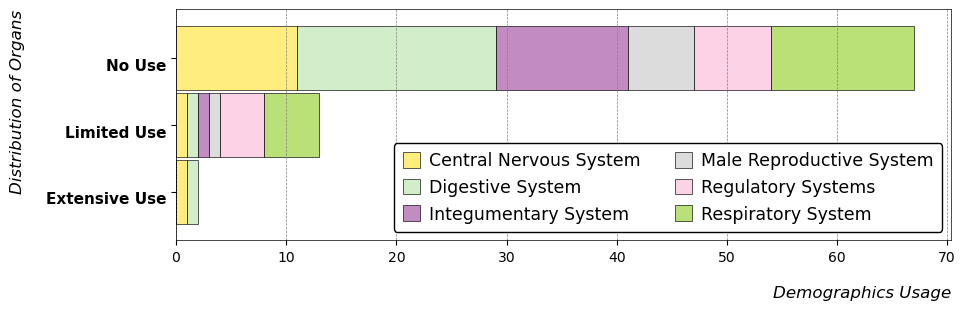

Plot saved to 05MICCAI_notebook_data_visualization/image_types_by_demographics_reclassified.png


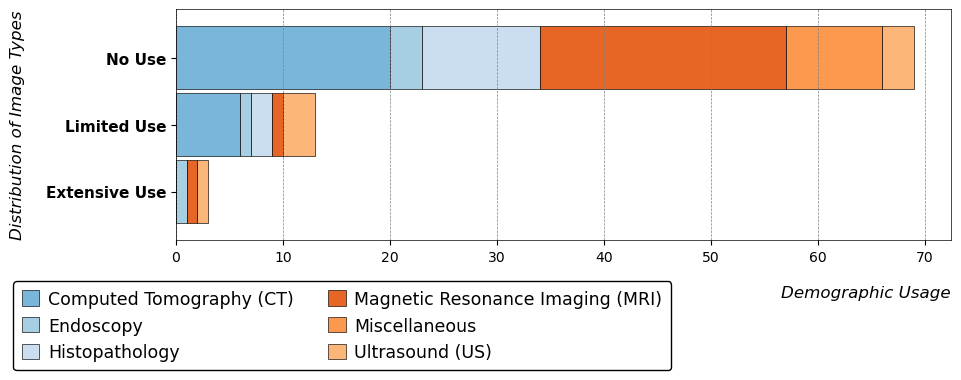

Plot saved to 05MICCAI_notebook_data_visualization/location_types_by_demographics_reclassified.png


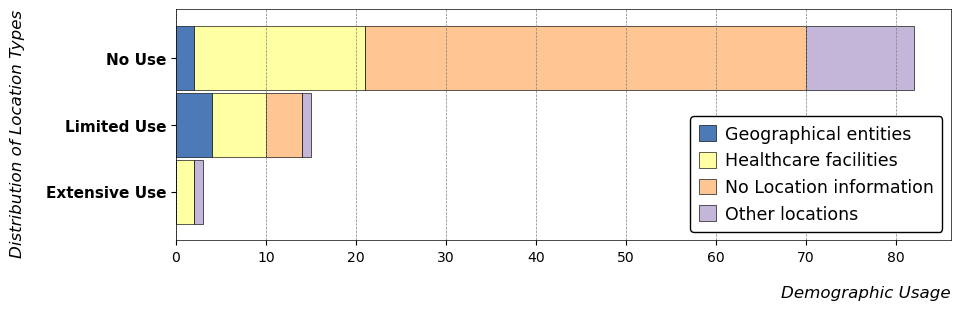

Plot saved to 05MICCAI_notebook_data_visualization/dataset_quantity_by_demographics_reclassified.png


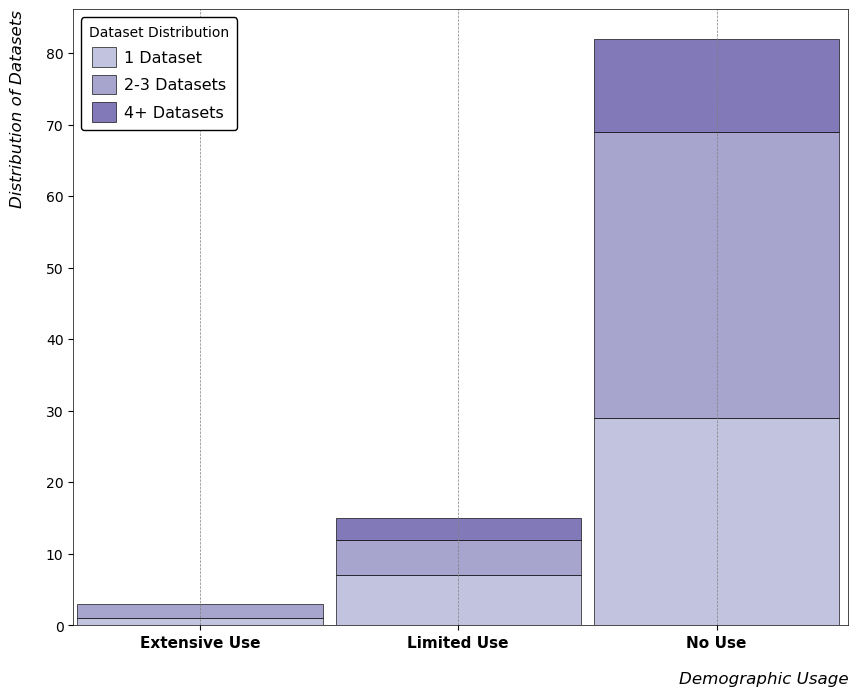

In [691]:
# Organ categories
'''Aggregate the organ categories into 5 categories based on top 5 organ categories'''
plot_organ_distribution_by_demographics(df1, 'organ_category_refined', 'demographics_usage', 'organs_by_demographics_reclassified.png')

# Image types
'''Plot top 5 Image Types'''
plot_image_distribution_by_demographics(df1, 'image_category', 'demographics_usage', 'image_types_by_demographics_reclassified.png')

# Location categories
'''Aggregate the location categories into 4 categories: 
1. Healthcare facilities
2. Other locations
3. Geographical entities
4. No Location information'''
plot_location_distribution_by_demographics(df1, 'demographics_usage', 'location_category', 'location_types_by_demographics_reclassified.png')

# Quantities of datasets
'''Aggrate the dataset quantities into 3 categories: 1, 2-3, 4+ datasets'''
plot_dataset_quantity_by_demographics(df1, 'demographics_usage', 'dataset quantity', 'dataset_quantity_by_demographics_reclassified.png')

Plot saved to 05MICCAI_notebook_data_visualization/organ_dataset_distribution.png


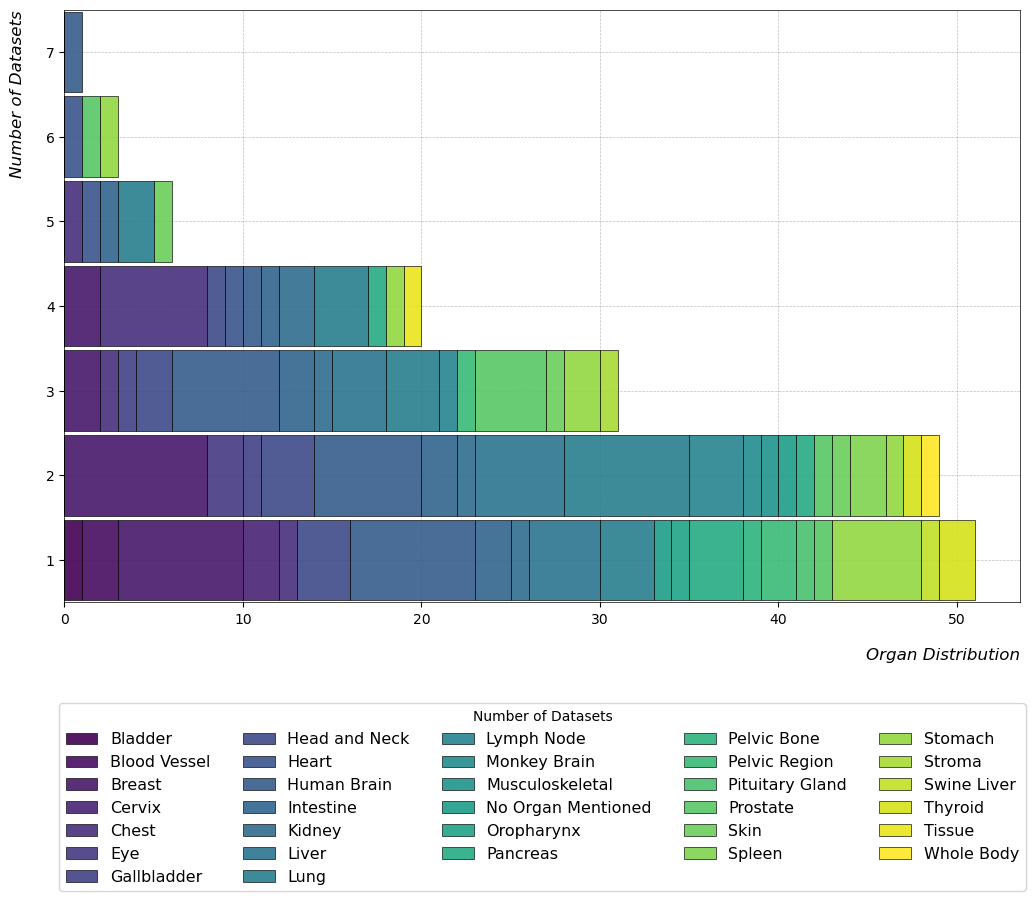

In [743]:
# Read the cleaned annotation data
df1 = pd.read_csv(filename)

def plot_dataset_quantity_by_organs(df, organ_column,dataset_column, save_path, organ_replacements=organ_mapping):
    """
    Plots a bar chart showing the distribution of the number of datasets used by papers, categorized by organs.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    organ_column (str): The column name for organ types.
    dataset_column (str): The column name for dataset quantity.
    save_path (str): The path to save the plot image.
    """
   
    # Check if each entry is a list, convert if not, and then standardize names
    #df[organ_column] = df[organ_column].apply(lambda x: [organ_replacements.get(item, item) for item in (x if isinstance(x, list) else [x])])

    #df_expanded[organ_column] = df_expanded[organ_column].apply(lambda x: organ_mapping.get(x, x))

    # Group dataset quantities by individual organ usage
    df1[organ_column] = df1[organ_column].str.strip('[]').str.replace("'", "").str.split(', ')
    df_expanded = df1.explode(organ_column)

    # Replace organ names in the DataFrame with standardized names using the mapping
    df_expanded[organ_column] = df_expanded[organ_column].apply(lambda x: organ_mapping.get(x, x))

    
    # Explode the organ_column so each organ type is in its own row
    #df_exploded = df.explode(organ_column)

    # Group by organ and dataset quantity, then count each group
    grouped = df_expanded.groupby([organ_column, dataset_column]).size().reset_index(name='Count')

    # Pivot data to get organ types as rows and dataset quantities as columns
    pivot_df = grouped.pivot_table(index= dataset_column, columns=organ_column, values='Count', fill_value=0)
    
    # Plotting
    fig, ax = plt.subplots(figsize=(11, 10))
    colors = plt.cm.viridis(np.linspace(0, 1, pivot_df.shape[1]))
    pivot_df.plot(kind='barh', stacked=True, ax=ax, color=colors, width=0.95, edgecolor='black', linewidth=0.5, alpha=0.9)
    
    plt.xlabel('Organ Distribution', fontsize=12, labelpad=15, loc='right', style='italic')
    plt.ylabel('Number of Datasets', fontsize=12, labelpad=15, loc='top', style='italic')
    
    # Dynamic dataset labels
    # dataset_labels = [f'{i} Dataset' if i == 1 else f'{i} Datasets' for i in sorted(pivot_df.columns)]
    # plt.legend(title="Number of Datasets", labels=dataset_labels, loc='upper left', fontsize='11.5')

    plt.legend(title="Number of Datasets", loc='lower center', fontsize='11.5', ncol=5, bbox_to_anchor=(0.5, -0.5))

    plt.ylim(0.5,7.5)

    # Adding grid lines
    ax.grid(True, linestyle='--', which='both', color='gray', alpha=0.5)
    ax.set_axisbelow(True)
    
    save_plot_to_folder(plt, save_path) # Save the plot to the plots folder
    plt.tight_layout()
   
    plt.show()

# This function now checks and handles whether the data in 'organ_column' is a list or a string, before exploding.
# Uncomment this to test the function with actual DataFrame and save path
plot_dataset_quantity_by_organs(df1, 'organ_types', 'dataset quantity', 'organ_dataset_distribution.png')


## MICCAI 2023 Volumes in 10 Parts
***

- Part I: Machine learning with limited supervision and machine learning – transfer learning;
- Part II: Machine learning – learning strategies; machine learning – explainability, bias, and uncertainty;
- Part III: Machine learning – explainability, bias and uncertainty; image segmentation;
- Part IV: Image segmentation;
- Part V: Computer-aided diagnosis;
- Part VI: Computer-aided diagnosis; computational pathology;
- Part VII: 
    - clinical applications – abdomen; 
    - clinical applications – breast; 
    - clinical applications – cardiac; 
    - clinical applications – dermatology; 
    - clinical applications – fetal imaging; 
    - clinical applications – lung; 
    - clinical applications – musculoskeletal; 
    - clinical applications – oncology; 
    - clinical applications – ophthalmology; 
    - clinical applications – vascular;
- Part VIII: Clinical applications – neuroimaging; microscopy;
- Part IX: Image-guided intervention, surgical planning, and data science;
- Part X: Image reconstruction and image registration.

In [40]:
# # Distribution of papers by volume (since they cover different ML methods, clinical applications, etc.)
# df1['vol'].value_counts().plot(kind='barh', figsize=(6, 3.5), color='skyblue', edgecolor='black', linewidth=0.5, alpha=0.8)

## Dataset Names and Usage in Selected MICCAI 2023 Articles
***

This section of the notebook analyses the datasets, which names has been provided by the articles.

In [41]:
# Load the Excel file
file_path = '../annotation_data/annotation_data_raw.xlsx'

# Read the sheet containing annotations of dataset names into a separate DataFrame
df1 = pd.read_excel(file_path, sheet_name='annotation_notes').fillna('None')
print('The  Number of Unique Titles:', len(df1['title'].unique()))

df1.head()
df1['name of dataset'] = df1['name of dataset'].str.lower()
unique_datasets = df1['name of dataset'].unique() 

The  Number of Unique Titles: 100


In [42]:
# Mapping dictionary: map variant names to a standardized name of datasets
name_mapping = {
    "Name of Dataset not Provided": "None",
    "PANDAS Dataset":  ['panda challenge dataset'],
    "PCa-AS Dataset": ['pca-as'], 
    "PCa-BT Dataset": ['pca-bt'], 
    "Lyon19 Challenge Dataset": ["lyon19 challenge dataset"],
    "NUCLICK Training Dataset": ["nuclick training dataset"],
    "CAMUS Dataset": ["camus dataset"],
    "JSRT Dataset": ["jsrt dataset", "the japanese society of radiological technology dataset"],
    "GVBLEED Dataset": ["gvbleed dataset"],
    "TNBN Dataset": ["tnbn dataset"],
    "KIRC Dataset": ["kirc dataset"],
    "CRC Dataset": ["crc dataset"],
    "LLD Dataset": ["lld study"],
    "DM Dataset": ["dm study"],
    "ADNI Dataset": ["alzheimer’s disease neuroimaging initiative (adni) dataset", "adni dataset", "adni"],
    "HMSS Dataset": ["hmss dataset"],
    "BUSI Dataset": ["busi dataset"],
    "BUSIS Dataset": ["busis dataset"],
    "Dataset B": ["dataset b"],
    "NSCLC-TCIA Dataset": ["nsclc-tcia dataset", "nsclc radiomics and nsclc radiogenomics"],
    "Montgomery Dataset": ["montgomery dataset"],
    "Shenzen Dataset": ["shenzen dataset"],
    "ISIC 2018 Dataset": ["isic 2018 dataset"],
    "CVC-ClinicDB Dataset": ["cvc-clinicdb dataset"],
    "OASIS-1 Dataset": ["oasis-1 dataset"],
    "BraTS Dataset 2021": ["2021 brats",  "brats 2021 dataset"],
    "BraTS Dataset 2020": ["2020 brats", "brats 2020 dataset"],
    "BraTS Dataset": ["brats dataset", "brats", "brain tumor segmentation challenge dataset"],
    "BraTS Dataset 2017": ["2017 brats", "brats 2017 dataset", "brain tumor segmentation challenge 2017 (brats) dataset"],
    "BraTS-Reg 2022 Dataset": ["brats-reg 2022 dataset"],
    "LIDC-IDRI Dataset": ["lidc-idri dataset"],
    "TCGA Dataset": ["tcga dataset", "the caner genome atlas (tcga)", "the cancer genome atlas (tcga)"],
    "Human Connectome Project": ["human connectome project", "hcp", "human connectome project (hcp) dataset"],
    "NIH ChestXray-8 Dataset": ["nih chestxray-8 (cxr8) dataset", "chestx-ray8 dataset", "chestxray8 dataset"],
    "NIH ChestXray-14 Dataset": ["nih chestxray-14 (cxr14) dataset", "chestx-ray14 dataset", "chestxray14 dataset"],
    "ChestXR Dataset": ["chestxr dataset"],
    "NLST Dataset": ["nlst dataset"],
    "LiTS Dataset": ["lits dataset"],
    "KiTS Dataset": ["kits dataset"],
    "QUBIQ 2020 Dataset": ["qubiq 2020 dataset"],
    "Breast-MRINACT-Pilot Dataset": ["breast-mrinact-pilot dataset"],
    "GBC US Dataset": ["gbc us dataset"],
    "Kvasir-SEG Dataset": ["kvasir-seg dataset"],
    "PolypGen Dataset": ["polypgen dataset"],
    "DLIVER Dataset": ["dliver dataset"],
    "DLUNG Dataset": ["dlung dataset"],
    "MSD Spleen Dataset": ["msd spleen dataset"],
    "AutoPET Dataset": ["autopet dataset"],
    "ABDOMEN-1K Dataset": ["abdomen-1k dataset"],
    "ABD-110 Dataset": ["abd-110 dataset"],
    "THORAX-85 Dataset": ["thorax-85 dataset"],
    "HaN Dataset": ["han dataset"],
    "CBIS-DDSM Dataset": ["cbis-ddsm dataset"],
    "INbreast Dataset": ["inbreast dataset"],
    "Eye Gaze Dataset": ["eye gaze dataset"],
    "Brain Genomics Superstruct Project": ["brain genomics superstruct project (gsp)", "gsp dataset"],
    "CD-ITB Dataset": ["cd-itb dataset"],
    "Camelyon16 Dataset": ["camelyon16 dataset"],
    "Camelyon17 Dataset": ["camelyon17 dataset"],
    "Camelyon Dataset": ["camelyon dataset", "grand challenge camelyon dataset"],
    "AIDA Dataset": ["aida brln dataset"],
    "DeepLesion Dataset": ["deeplesion dataset"],
    "ISLES Dataset": ["isles dataset", "ischemic stroke lesion segmentation challenge 2015 (isles) dataset"],
    "VINDR-CXR Dataset": ["vindr-cxr dataset"],
    "HECKTOR 2022 Dataset": ["hecktor 2022 dataset"],
    "DECATH-Pancreas Dataset": ["decath-pancreas dataset"],
    "Colored MNIST Dataset": ["colored mnist dataset", "colered mnist dataset",],
    "MNIST Dataset": ["mnist dataset"],
    "HER2 Dataset": ["her2 dataset"],
    "MIMIC-CXR Dataset": ["mimic-cxr dataset"],
    "COVID-19 Segmentation Benchmark": ["covid-19 segmentation benchmark"],
    "ChestMNIST Dataset": ["chestmnist dataset"],
    "DERMAMNIST Dataset": ["dermamnist dataset"],
    "MEDMNISTv2 Dataset": ["medmnistv2 dataset"],
    "Jerry Dataset": ["jerry dataset"],
    "COFFBEE Dataset": ["coffbee dataset"],
    "GOLD ATLAS Dataset": ["gold atlas dataset", "gold atlas - male pelvis - gentle radiotherapy dataset"],
    "RESECT Dataset": ["resect dataset", "resect (retro-spective evaluation of cerebral tumors) dataset", "cerebral tumors (resect) miccai challenge dataset"],
    "Learn2Reg Challenge Dataset": ["learn2reg challenge dataset "],
    "TCGA-NSCLC": ["tcga-nsclc dataset"], 
    "HaN-SEG Dataset": ["han-seg dataset"],
    "REFUGE Dataset": ["refuge dataset"],
    "PDDCA Dataset": ["pddca dataset"],
    "SPARE Dataset": ["spare varian dataset"],
    "ABIDE Dataset": ["abide dataset"],
    "ADHD Dataset": ["adhd dataset"],
    "IXI Dataset": ["ixi dataset"],
    "Mindboggle Dataset": ["mindboggle dataset"],
    "Buckner Dataset": ["buckner dataset"],
    "LPBA Dataset": ["lpba dataset"],
    "GSP Dataset": ["gsp dataset", "brain genomics superstruct project (gsp) dataset"],
    "LUNGx Challenge Dataset": ["lungx challenge dataset"],
    "ACDC Dataset": ["acdc dataset", "aapm low dose ct grand challenge abdominal dataset"],
    "M&Ms Dataset": ["m&ms dataset", "m&ms1-2 dataset"],
    "CMRxMotion Dataset": ["cmrxmotion dataset"],
    "CONSEP1 Dataset": ["consep1 dataset"],
    "BRCA-M2C2 Dataset": ["brca-m2c2 dataset"],
    "LIZARD3 Dataset": ["lizard3 dataset"],
    "Ex Vivo Monkey DMRI Dataset": ["ex vivo monkey dmri dataset"],
    "In Vivo Human Brain MTE Dataset": ["in vivo human brain mte dataset"],
    "FastMRI+ Dataset": ["fastmri+ dataset"],
    "ATLAS v2.0 Dataset": ["atlas v2.0 dataset"],
    "KiTS19 Dataset": ["kits19 dataset"],
    "KiTS21 Dataset": ["kits21 dataset"],
    "PNEN Dataset": ["pnen dataset"],
    "BreakHis Dataset": ["breakhis dataset"],
    "MSSEG Dataset": ["msseg dataset"],
    "Skin3D Dataset": ["skin3d dataset"],
    "TCGA-BRCA Dataset": ["tcga-brca dataset"],
    "Mayo Clinic Low-Dose CT Grand Challenge Dataset": ["mayo-clinic low-dose ct grand challenge dataset"],
    "RIDER Dataset": ["rider dataset"],
    "PatchGastric Stomach Tumor Pathological Image Dataset": ["patchgastric stomach tumor pathological image dataset"],
    "MSKUS Dataset": ["mskus dataset"],
    "Gaze Dataset": ["gaze dataset"],
    "Easy-RESECT Dataset": ["easy-resect (retrospective evaluation of cerebral tumors) dataset"],
    "ISPY-1 Dataset": ["ispy-1 dataset"],
    "Intra Dataset": ["intra dataset"],
    "TCIA Dataset": ["the cancer imaging archive (tcia)"],
}

In [43]:
# Function to normalize and map dataset names
def normalize_datasets(datasets, mapping):
    standardized_datasets = []
    for entry in datasets:
        # Split the entry if it contains multiple datasets
        sub_entries = map(str.strip, entry.split(','))
        for sub in sub_entries:
            normalized = None
            # Check each mapped name to find a match
            for standard, variants in mapping.items():
                if any(var.lower() in sub.lower() for var in variants):
                    normalized = standard
                    break
            if normalized:
                standardized_datasets.append(normalized)
            else:
                standardized_datasets.append(sub)  # Keep original if no match found
    return standardized_datasets

# Apply normalization
normalized_list = normalize_datasets(unique_datasets, name_mapping)
print('Number of unique datasets:', len(normalized_list))
print('Number of unique standardized datasets:', len(set(normalized_list)))
def categorize_datasets(dataframe):    
    # Split the row by comma and strip spaces
    dataset_names = [x.strip() for x in dataframe.split(',')]
    # Initialize a set to hold unique categories for this row
    row_categories = set()
    for name in dataset_names:
        # Check each category for a match and add to the set
        for category, types in name_mapping.items():
            if name in types:
                row_categories.add(category)
                break
    # Return a comma-separated string of unique categories or a single category
    return ', '.join(row_categories) if row_categories else 'Name of Dataset not Provided'


df1['normalized_datasets'] = df1['name of dataset'].apply(categorize_datasets)
df1.to_csv(notebook_name + 'normalized_datasets.csv', index=False)
dataset_counts = df1['normalized_datasets'].str.split(',').explode().str.strip().value_counts()


unique_datasets = dataset_counts.index.tolist()
unique_datasets_df = pd.DataFrame(unique_datasets, columns=['datasets'])
unique_datasets_df['count'] = dataset_counts.values
unique_datasets_df['percentage'] = (dataset_counts.values / dataset_counts.sum()) * 100
unique_datasets_df.to_csv(notebook_name + 'dataset_counts.csv', index=False)

Number of unique datasets: 162
Number of unique standardized datasets: 8


## Plotly
***

In [44]:
import pandas as pd
import plotly.graph_objects as go

In [45]:
# Function that plots a Sankey diagram for organ to demographics category distribution
def prepare_and_plot_sankey_organs(file_path):
    # Load data
    data = pd.read_csv(file_path)
    
    # Select relevant columns and handle missing values
    sankey_data = data[['organ_category_refined', 'demographics_usage']].fillna('Unknown')
    
    # Expand the 'organ_category_refined' to separate rows for each category
    # Assuming categories are separated by ', ' (comma and space)
    sankey_data['organ_category_refined'] = sankey_data['organ_category_refined'].str.split(', ')
    sankey_data = sankey_data.explode('organ_category_refined')
    
    # Create a dataframe for Sankey diagram that includes source, target, and count of flows
    sankey_df = sankey_data.groupby(['organ_category_refined', 'demographics_usage']).size().reset_index(name='count')
    sankey_df['source'] = sankey_df['organ_category_refined'].astype(str)
    sankey_df['target'] = sankey_df['demographics_usage']
    
    # Map each unique node to an index for Plotly's Sankey diagram
    all_nodes = pd.concat([sankey_df['source'], sankey_df['target']]).unique()
    node_indices = {node: i for i, node in enumerate(all_nodes)}
    
    # Convert node names to indices for the Sankey diagram
    sankey_df['source'] = sankey_df['source'].map(node_indices)
    sankey_df['target'] = sankey_df['target'].map(node_indices)

    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=25,
            thickness=50,
            line=dict(color="black", width=0.5),
            label=all_nodes,
      
        ),
        link=dict(
            source=sankey_df['source'],
            target=sankey_df['target'],
            value=sankey_df['count']
        ))])
    
    fig.update_layout(title_text="Sankey Diagram: Organ to Demographics Category Distribution",
                      font_size=12, width=1000, height=800, autosize=False, margin=dict(l=100, r=100, t=100, b=100),
                      plot_bgcolor='rgba(0,0,0,0)', hovermode='x', hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial', 
                      font_color='black', bordercolor='black'))
    return fig


In [46]:
# Function that plots a Sankey diagram for image type to demographics category distribution
def prepare_and_plot_sankey_images(file_path):
    # Load data
    data = pd.read_csv(file_path)
    
    # Select relevant columns and handle missing values
    sankey_data = data[['image_category', 'demographics_usage']].fillna('Unknown')
    
    # Expand the 'organ_category_refined' to separate rows for each category
    # Assuming categories are separated by ', ' (comma and space)
    sankey_data['image_category'] = sankey_data['image_category'].str.split(', ')
    sankey_data = sankey_data.explode('image_category')
    
    # Create a dataframe for Sankey diagram that includes source, target, and count of flows
    sankey_df = sankey_data.groupby(['image_category', 'demographics_usage']).size().reset_index(name='count')
    sankey_df['source'] = sankey_df['image_category'].astype(str)
    sankey_df['target'] = sankey_df['demographics_usage']
    
    # Map each unique node to an index for Plotly's Sankey diagram
    all_nodes = pd.concat([sankey_df['source'], sankey_df['target']]).unique()
    node_indices = {node: i for i, node in enumerate(all_nodes)}
    
    # Convert node names to indices for the Sankey diagram
    sankey_df['source'] = sankey_df['source'].map(node_indices)
    sankey_df['target'] = sankey_df['target'].map(node_indices)

    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=25,
            thickness=50,
            line=dict(color="black", width=0.5),
            label=all_nodes,
          
        ),
        link=dict(
            source=sankey_df['source'],
            target=sankey_df['target'],
            value=sankey_df['count']
        ))])
    
    fig.update_layout(title_text="Sankey Diagram: Image Types to Demographics Category Distribution",
                      font_size=12, width=1000, height=800, autosize=False, margin=dict(l=100, r=100, t=100, b=100),
                      plot_bgcolor='rgba(0,0,0,0)', hovermode='x', hoverlabel=dict(bgcolor='white', font_size=12, font_family='Arial', 
                      font_color='black', bordercolor='black'))
    return fig

In [47]:
# Function that plots a Sankey diagram from demographics category to location category, and then to organ category
def prepare_and_plot_sankey_extended(file_path):
    # Load data
    data = pd.read_csv(file_path)
    
    # Select relevant columns including new ones
    sankey_data = data[['demographics_usage', 'location_category', 'image_category', 'organ_category_refined']]
    
    # Handle missing values
    sankey_data.fillna('Unknown', inplace=True)
    
    # Expand the 'organ_category_refined' and 'image_category' to separate rows for each category
    # Assuming categories are separated by ', ' (comma and space)
    sankey_data['organ_category_refined'] = sankey_data['organ_category_refined'].str.split(', ')
    sankey_data = sankey_data.explode('organ_category_refined').explode('image_category')

    # Create a dataframe for Sankey diagram that includes source, target, and count of flows
    sankey_df = pd.DataFrame(columns=['source', 'target', 'value'])

    # Define the order of columns for the flow: demographics to location/image category to organ category
    demographic_columns = ['demographics_usage']
    intermediate_columns = ['location_category']
    
    # First handle flows from demographic to intermediate categories
    for demo_col in demographic_columns:
        for inter_col in intermediate_columns:
            flow_counts = sankey_data.groupby([demo_col, inter_col]).size().reset_index(name='count')
            flow_counts['source'] = flow_counts[demo_col].astype(str)
            flow_counts['target'] = flow_counts[inter_col].astype(str)
            sankey_df = pd.concat([sankey_df, flow_counts[['source', 'target', 'count']]], axis=0)
    
    # Now handle flows from intermediate categories to organ category
    for inter_col in intermediate_columns:
        flow_counts = sankey_data.groupby([inter_col, 'organ_category_refined']).size().reset_index(name='count')
        flow_counts['source'] = flow_counts[inter_col].astype(str)
        flow_counts['target'] = flow_counts['organ_category_refined'].astype(str)
        sankey_df = pd.concat([sankey_df, flow_counts[['source', 'target', 'count']]], axis=0)
    
    # Map each unique node to an index for Plotly's Sankey diagram
    all_nodes = pd.concat([sankey_df['source'], sankey_df['target']]).unique()
    node_indices = {node: i for i, node in enumerate(all_nodes)}
    
    # Convert node names to indices
    sankey_df['source'] = sankey_df['source'].map(node_indices)
    sankey_df['target'] = sankey_df['target'].map(node_indices)
    
    # Create the Sankey diagram
    fig = go.Figure(data=[go.Sankey(
        node=dict(
            pad=15,
            thickness=20,
            line=dict(color="black", width=0.5),
            label=all_nodes,
        ),
        link=dict(
            source=sankey_df['source'],
            target=sankey_df['target'],
            value=sankey_df['count']
        ))])
    
    fig.update_layout(title_text="Sankey Diagram: Detailed Demographic Flows to Organ Category",
                      font_size=10)
    
    return fig

In [48]:
# Sankey diagram for image types to demographics category distribution
fig = prepare_and_plot_sankey_organs(filename)
fig.show()


# Sankey diagram for image category distribution
fig = prepare_and_plot_sankey_images(filename)
fig.show()


# Sankey diagram for detailed demographic flows: demographics, to location types to organ category
fig = prepare_and_plot_sankey_extended(filename)
fig.show()



/var/folders/bn/qvp15lc54w559qnxjpvy0bzw0000gn/T/ipykernel_23712/3991387800.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/bn/qvp15lc54w559qnxjpvy0bzw0000gn/T/ipykernel_23712/3991387800.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

